In [1]:

import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns


In [2]:
df = pd.read_csv(r"D:\MLProjects\ZDatasets\AirlineData\data\Data_Train.csv")
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:

condtion = df['Route'].isnull()==True
df[condtion]



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9038,Air India,06-05-2019,Delhi,Cochin,NaN,09:45,07-05-2023 09:25,23h 40m,NaN,No info,7480


In [5]:
condtion = df['Total_Stops'].isnull()==True
df[condtion]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9038,Air India,06-05-2019,Delhi,Cochin,NaN,09:45,07-05-2023 09:25,23h 40m,NaN,No info,7480


In [6]:
# replace missing Value of Route using Mode as Route is categorical COlumn
modeOfRoute = df['Route'].mode()[0]
modeOfRoute

df['Route'].fillna(modeOfRoute,inplace=True)
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# replace missing Value of Total_Stops using Mode as Total_Stops is categorical COlumn
modeOfTotal_Stops = df['Total_Stops'].mode()[0]
df['Total_Stops'].fillna(modeOfTotal_Stops,inplace=True)
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:

# Problem statement is to predict the airfare
# Size of the Data
# View of the Data
# Datatypes 
# Check Missing Values
# how mathematically look like?
# Check if the duplicate Values
# Correlation between columns
# Graph Analysis(CountPlot,barplot,boxplot)


In [9]:
# Size of the Data
df.shape


(10682, 11)

In [10]:
# View of the Data
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [11]:
# Datatypes 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [12]:
# Check Missing Values

df.isnull().sum()



Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
# how mathematically look like?
df.describe()


,Price
count,10682.000000
mean,9086.292735
std,4610.885695
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [14]:
df.duplicated().sum()



220

In [15]:
df.drop_duplicates(inplace=True)


In [16]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


<Axes: >

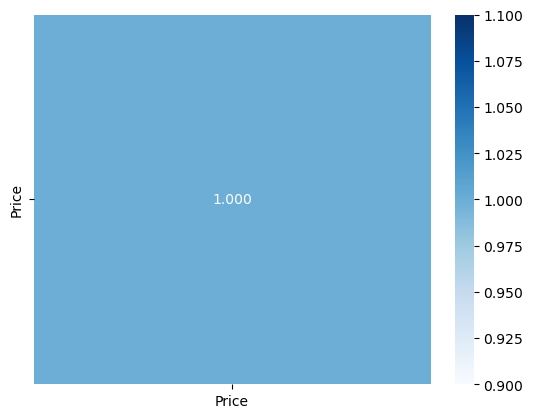

In [17]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")


In [18]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [19]:
print(df['Airline'].value_counts())


Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [20]:
#counts/Unique


# Multiple carriers Premium economy with the Multiple carriers
# Jet Airways Business with Jet Airways
# Vistara Premium economy Vistara 

df['Airline'].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
df['Airline'].replace("Jet Airways Business","Jet Airways",inplace=True)
df['Airline'].replace("Vistara Premium economy","Vistara",inplace=True)
print("----------------------")
print(df['Airline'].value_counts())


----------------------
Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


In [21]:
df['Source'].value_counts()


Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [22]:
df['Destination'].value_counts()


Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [23]:
df['Destination'].replace(to_replace="New Delhi",value="Delhi",inplace=True)
df['Destination'].value_counts()


Cochin       4346
Banglore     2860
Delhi        2179
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [24]:
df.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [25]:
# Know the Value counts of the categorical Data.

col1 = ['Airline','Source','Destination','Route','Duration','Additional_Info']

for i in col1:
    print(df[i].value_counts())
    print()
    print()


Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       696
Chennai      381
Name: Source, dtype: int64


Cochin       4346
Banglore     2860
Delhi        2179
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64


DEL ? BOM ? COK          2377
BLR ? DEL                1536
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: Route, Length: 128, dtype: int64


2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
36h 25m      1
30h 25m      1
30h 15m

In [26]:
# Graph based Analyis


In [27]:
# Count Plot , count of the specified feature



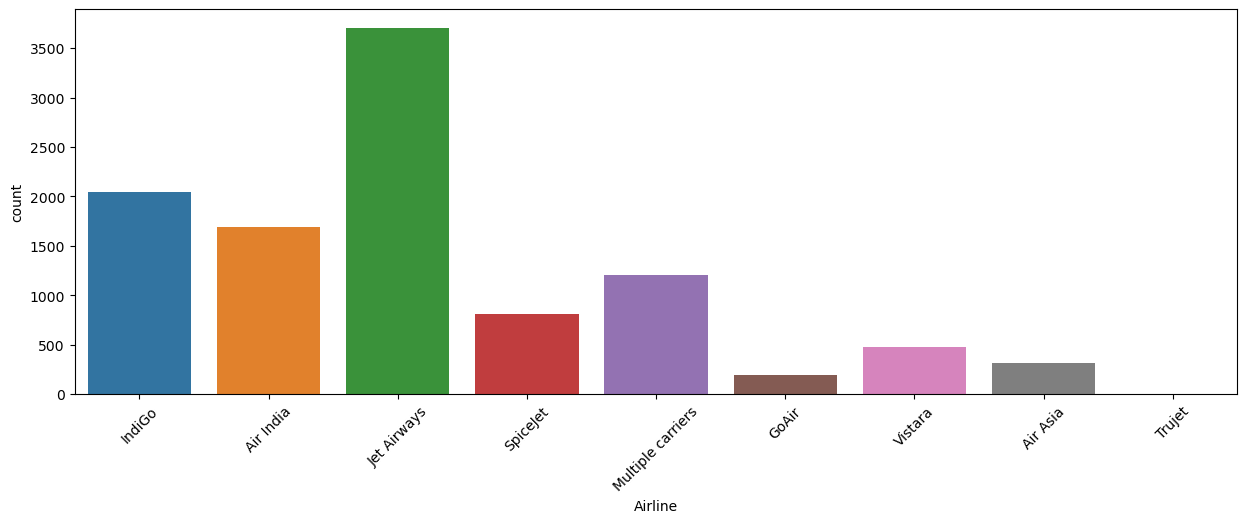

In [28]:
# Airline
# Jet Airways has the maximum flying While Truejest has the least
plt.figure(figsize=(15,5))
sns.countplot(x=df['Airline'])
plt.xticks(rotation=45) 
plt.show() 


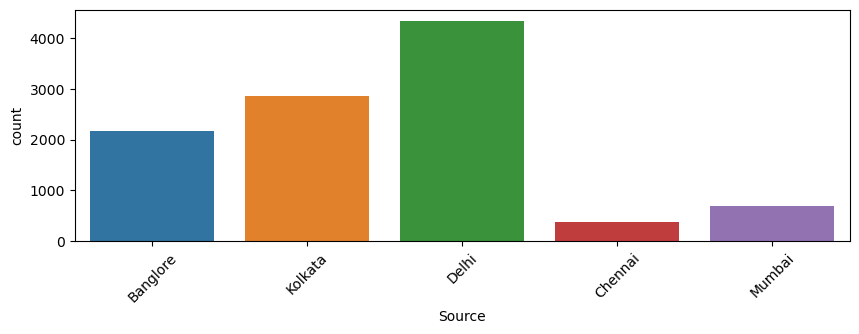

In [29]:
# Source
# Delhi has the maximum take offs chennai has the lest
plt.figure(figsize=(10,3))
sns.countplot(x=df['Source'])
plt.xticks(rotation=45) 
plt.show() 


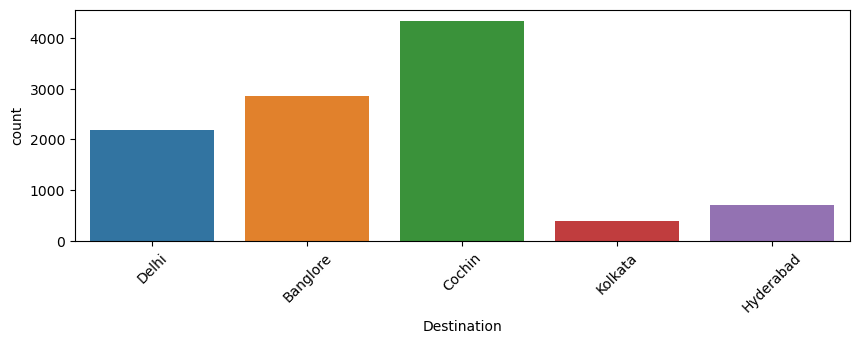

In [30]:
# Destination
# Coachin has the maximum Arrivals
plt.figure(figsize=(10,3))
sns.countplot(x=df['Destination'])
plt.xticks(rotation=45) 
plt.show() 


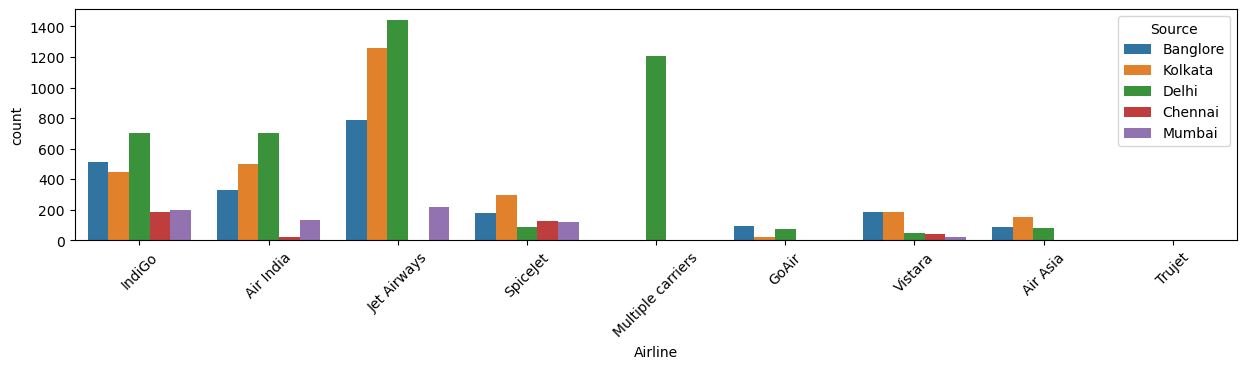

In [31]:
# multivariate Analysis
plt.figure(figsize=(15,3))
sns.countplot(x=df['Airline'],hue=df['Source'])
plt.xticks(rotation=45) 
plt.show() 


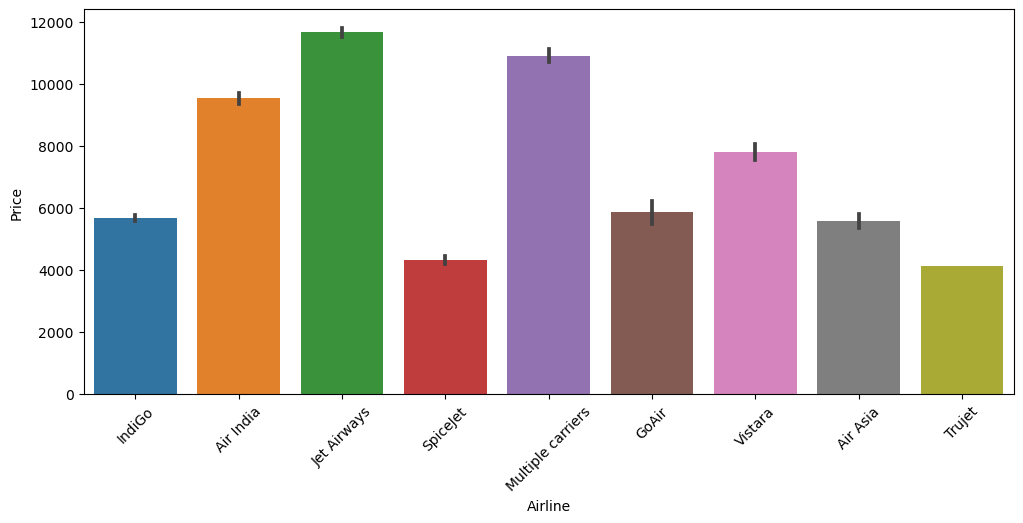

In [32]:

plt.figure(figsize=(12,5))
sns.barplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


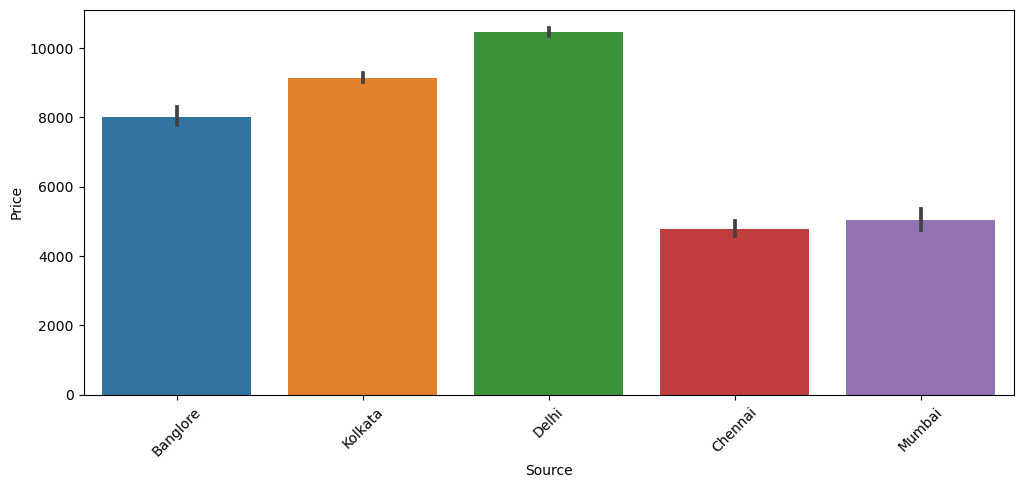

In [33]:

plt.figure(figsize=(12,5))
sns.barplot(x=df['Source'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<Figure size 1000x1000 with 0 Axes>

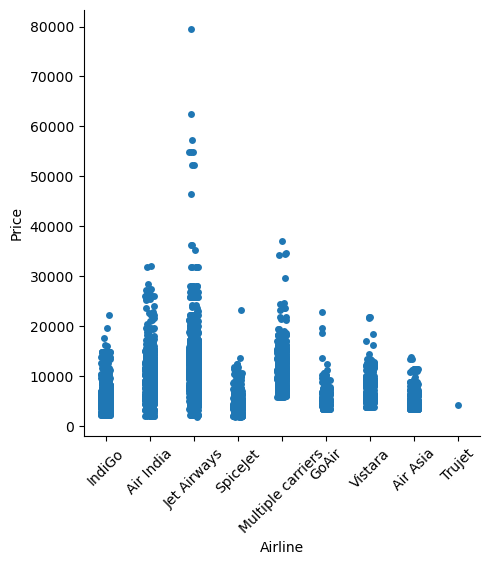

In [34]:
plt.figure(figsize=(10,10))
sns.catplot(x=df['Airline'], y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


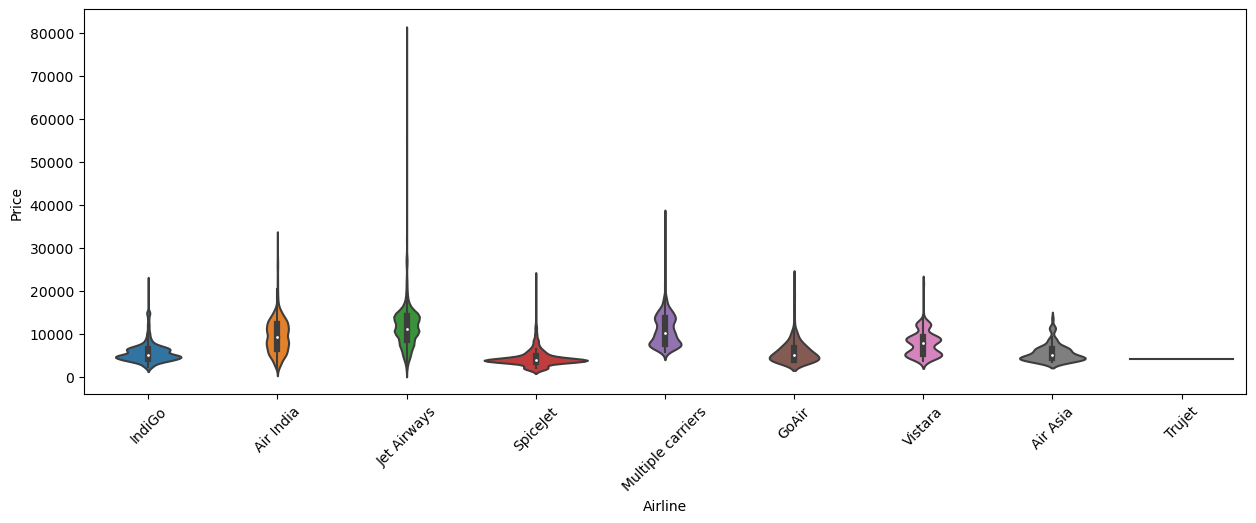

In [35]:

plt.figure(figsize=(15,5))
sns.violinplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


In [36]:
'''
plt.figure(figsize=(15,5))
sns.swarmplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 

'''

"\nplt.figure(figsize=(15,5))\nsns.swarmplot(x=df['Airline'],y=df['Price'])\nplt.xticks(rotation=45) \nplt.show() \n\n"

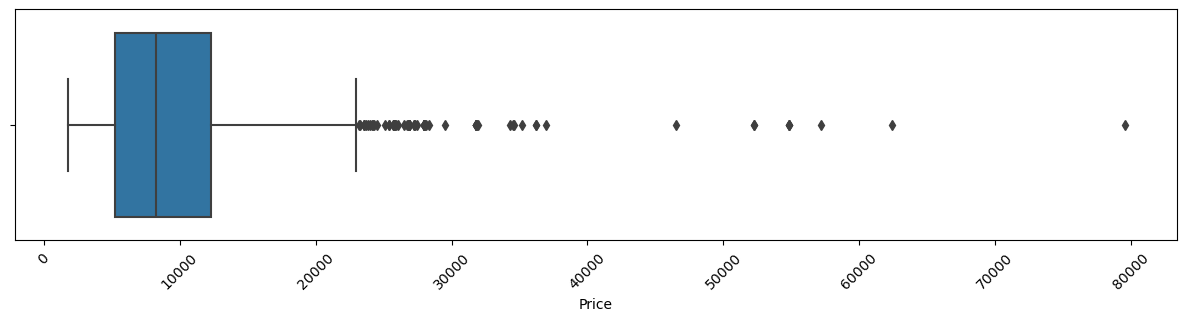

In [37]:
# Outlier Detection
plt.figure(figsize=(15,3))

sns.boxplot(x=df['Price'])
plt.xticks(rotation=45) 
plt.show() 



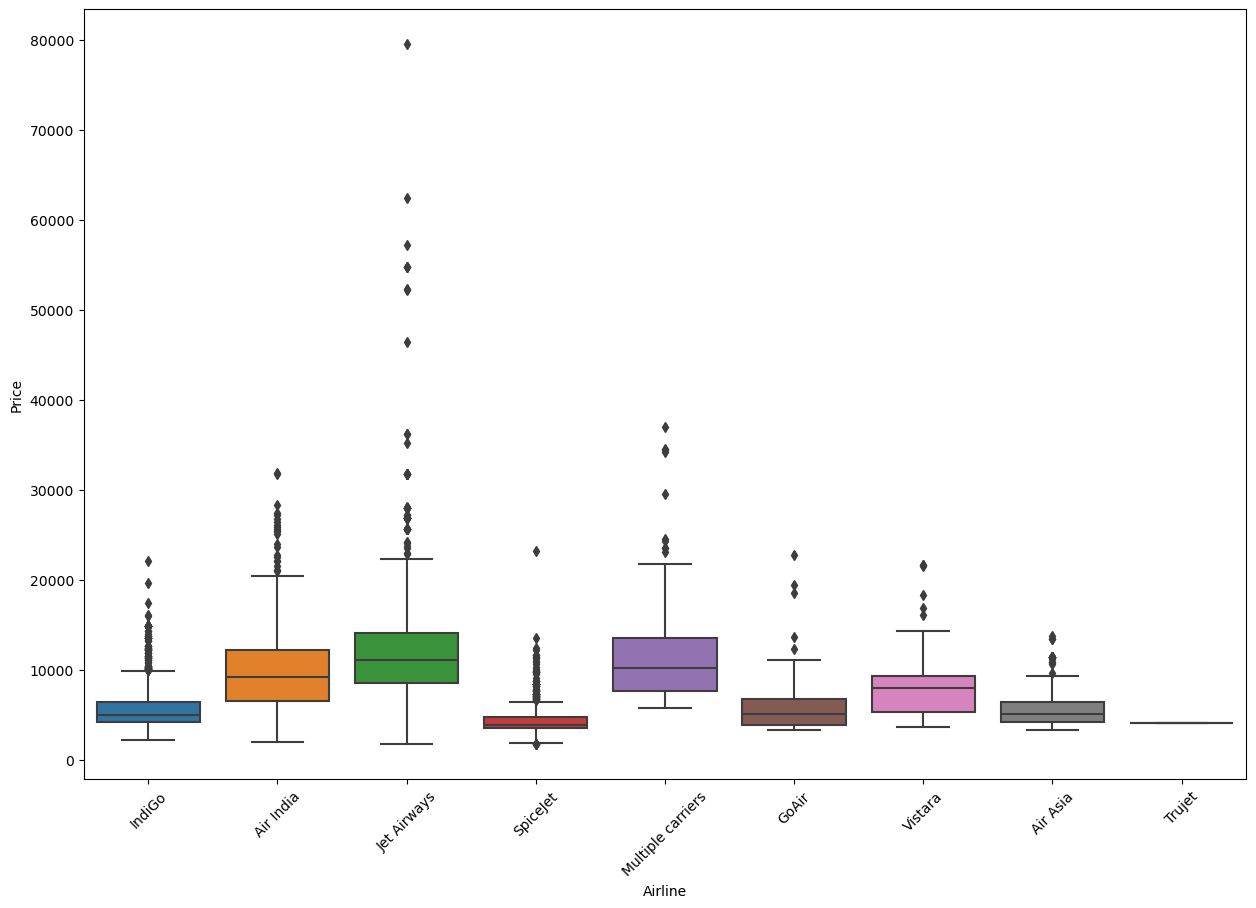

In [38]:
# Outlier Detection

plt.figure(figsize=(15,10))
sns.boxplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<Axes: xlabel='Price', ylabel='Density'>

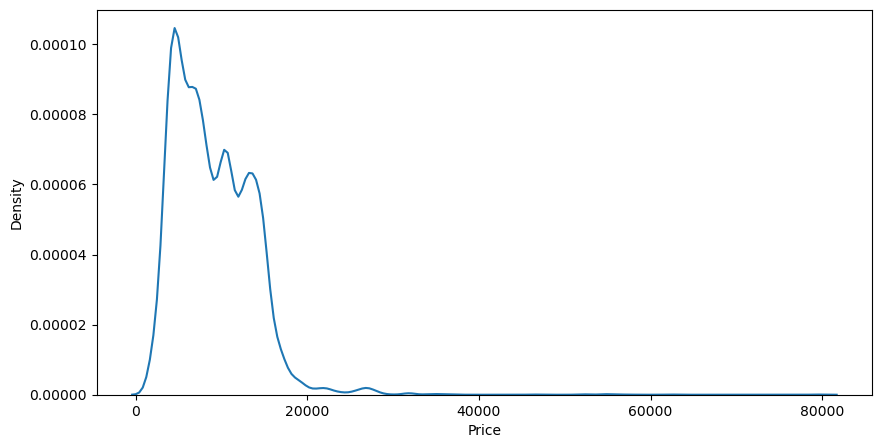

In [39]:

plt.figure(figsize=(10,5))
sns.kdeplot(x=df['Price'])


<Axes: xlabel='Price', ylabel='Count'>

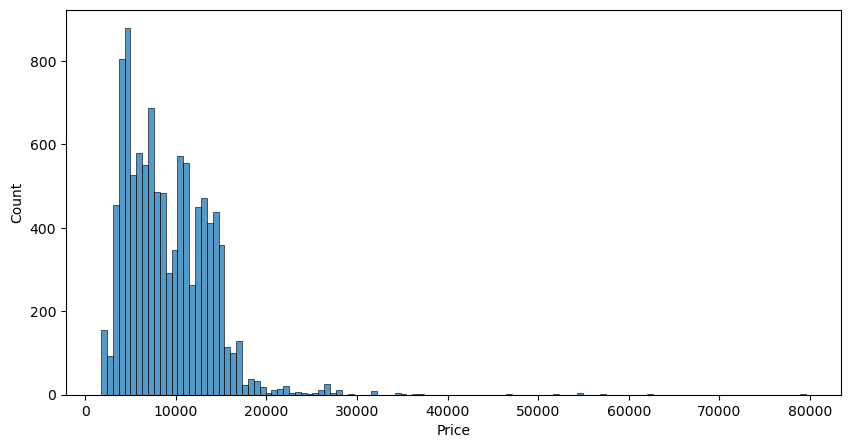

In [40]:
df['Airline']
plt.figure(figsize=(10,5))
sns.histplot(x=df['Price'])


<Axes: xlabel='Price', ylabel='Count'>

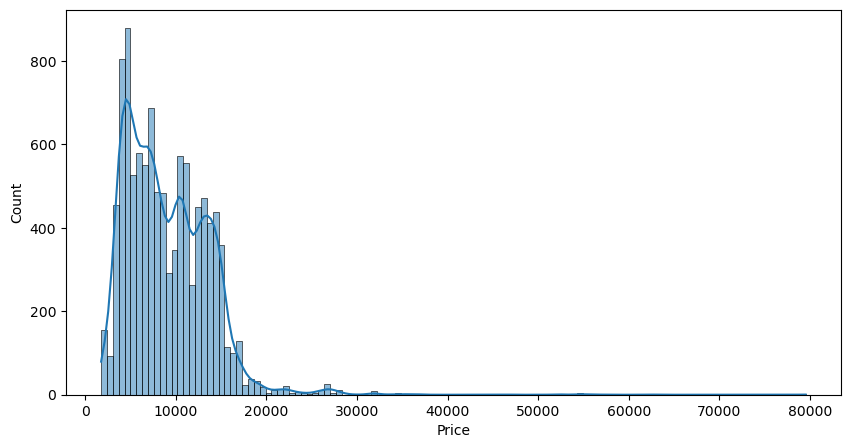

In [41]:
df['Airline']
plt.figure(figsize=(10,5))
sns.histplot(x=df['Price'],kde=True)


In [42]:
df[df['Airline']=='Air India']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
10,Air India,01-06-2019,Delhi,Cochin,DEL ? BLR ? COK,09:45,23:00,13h 15m,1 stop,No info,8907
12,Air India,24-06-2019,Chennai,Kolkata,MAA ? CCU,11:40,13:55,2h 15m,non-stop,No info,4667
15,Air India,03-03-2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,16:40,04-03-2023 19:15,26h 35m,2 stops,No info,14011
18,Air India,12-06-2019,Delhi,Cochin,DEL ? CCU ? BOM ? COK,20:15,13-06-2023 19:15,23h,2 stops,No info,13381
...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,12-05-2019,Kolkata,Banglore,CCU ? IXR ? DEL ? BLR,05:50,23:15,17h 25m,2 stops,No info,11411
10670,Air India,06-06-2019,Mumbai,Hyderabad,BOM ? HYD,21:05,22:25,1h 20m,non-stop,No info,3100
10674,Air India,09-06-2019,Mumbai,Hyderabad,BOM ? HYD,06:20,07:40,1h 20m,non-stop,No info,3100
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145


In [43]:
for i in list(enumerate(df['Airline'].unique())):
    print(i[0]+1)
    

1
2
3
4
5
6
7
8
9


In [44]:
df['Airline'].unique()


array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [45]:
listOfAirline = list(enumerate(df['Airline'].unique()))
listOfAirline


[(0, 'IndiGo'),
 (1, 'Air India'),
 (2, 'Jet Airways'),
 (3, 'SpiceJet'),
 (4, 'Multiple carriers'),
 (5, 'GoAir'),
 (6, 'Vistara'),
 (7, 'Air Asia'),
 (8, 'Trujet')]

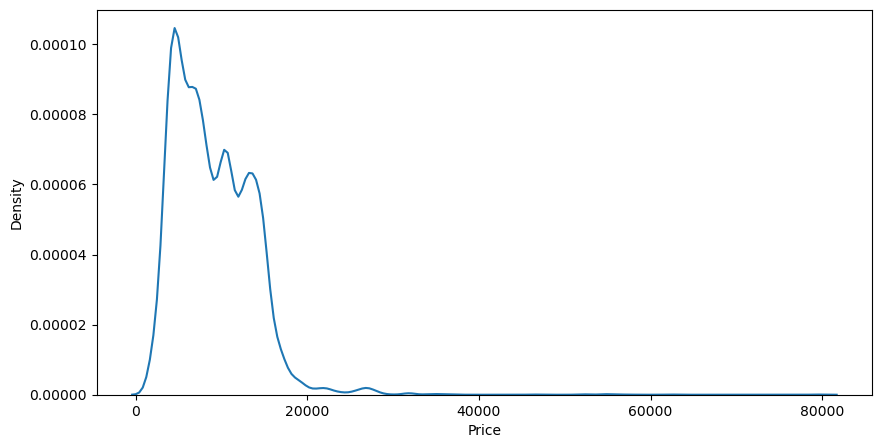

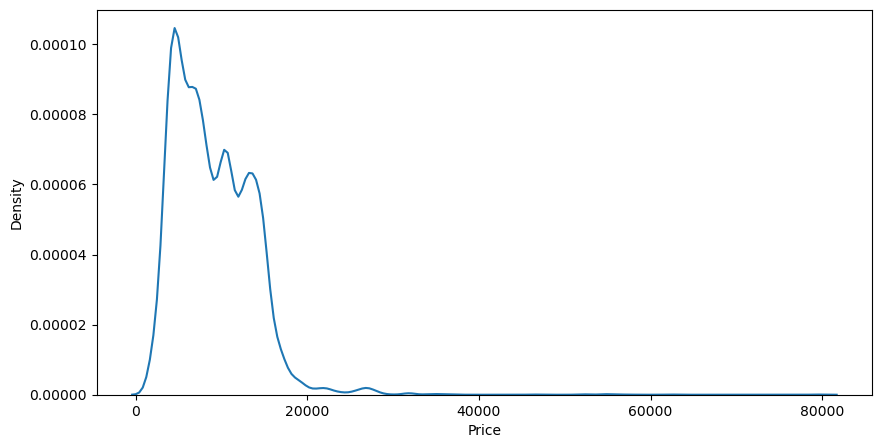

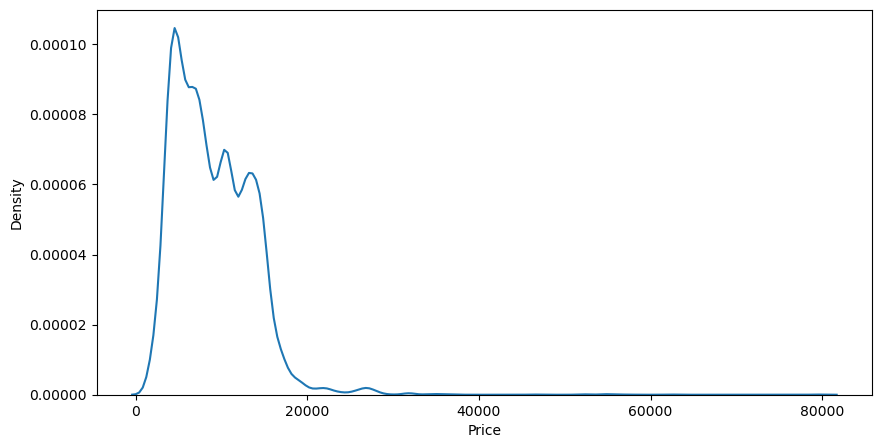

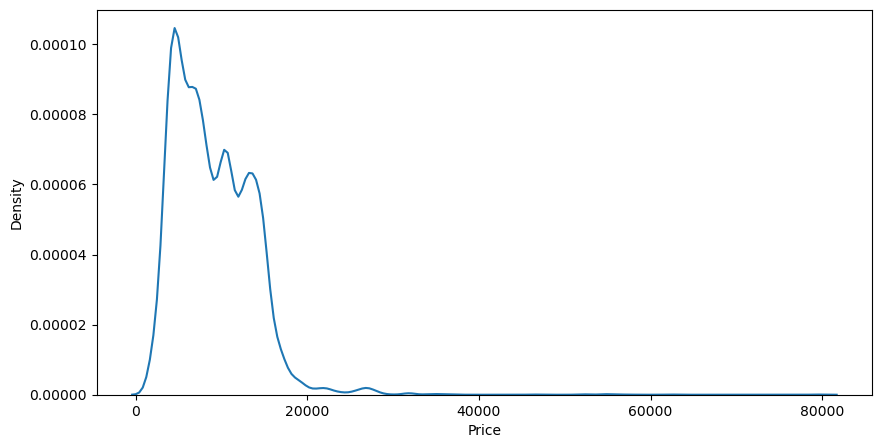

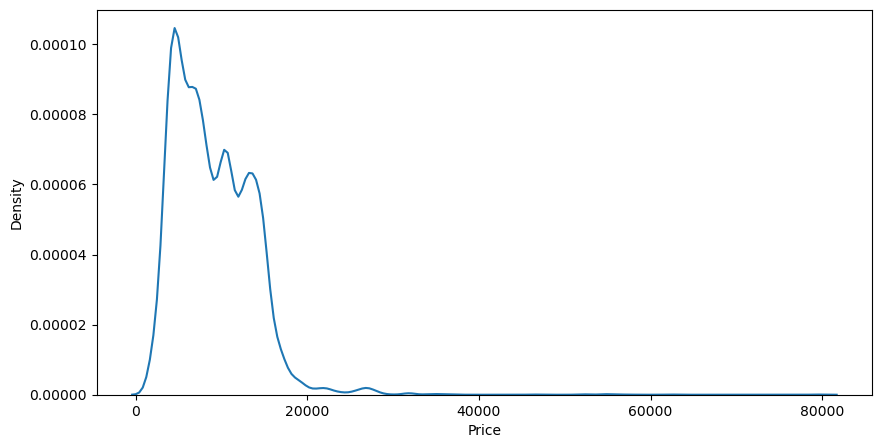

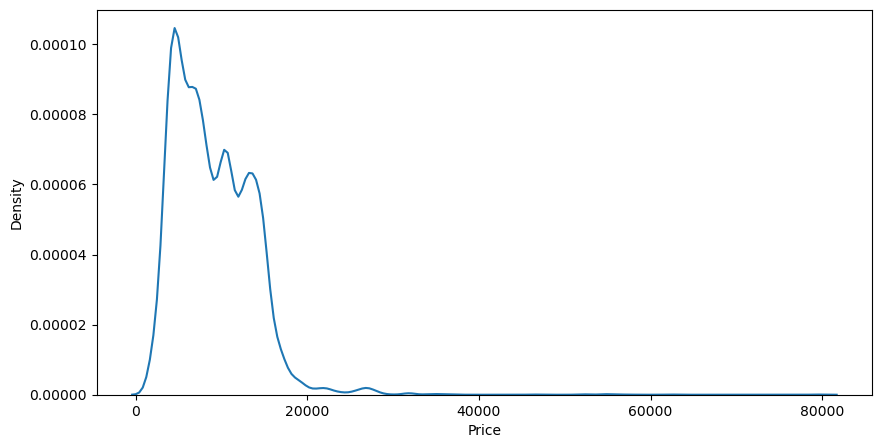

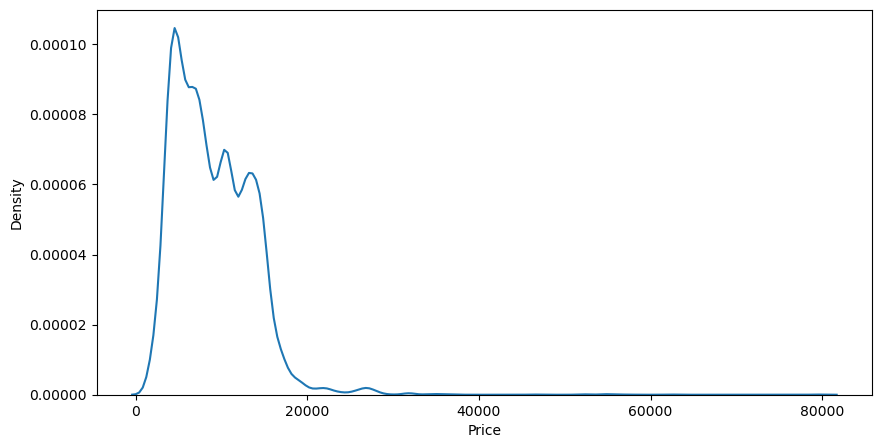

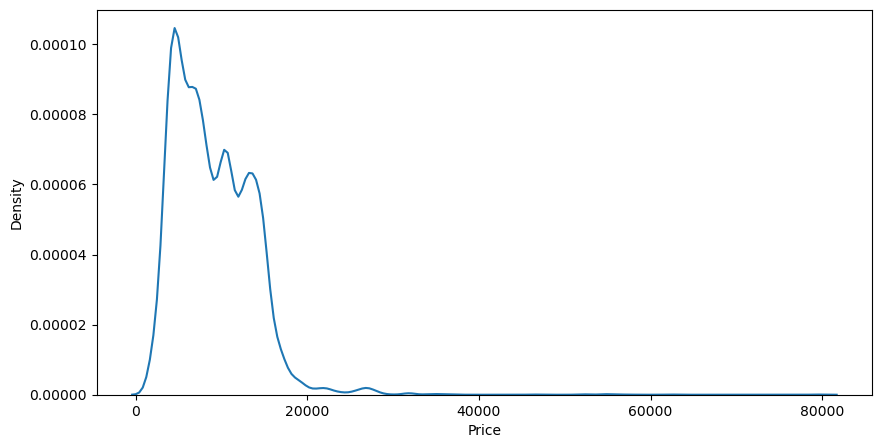

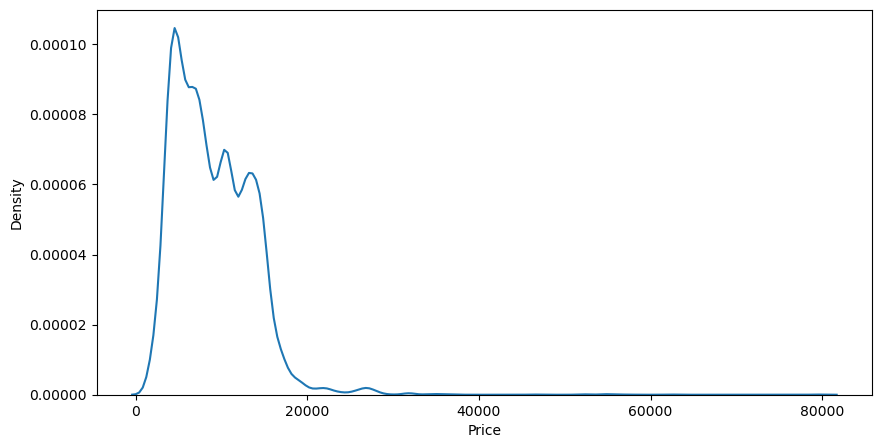

In [46]:
for i in listOfAirline:
    plt.figure(figsize=(10,5))
    sns.kdeplot(x=df['Price'])

    


In [47]:
df[df['Airline']=='Jet Airways']



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
6,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,18:55,13-03-2023 10:25,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,08:00,02-03-2023 05:05,21h 5m,1 stop,No info,22270
8,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,08:55,13-03-2023 10:25,25h 30m,1 stop,In-flight meal not included,11087
13,Jet Airways,09-05-2019,Kolkata,Banglore,CCU ? BOM ? BLR,21:10,10-05-2023 09:20,12h 10m,1 stop,In-flight meal not included,9663
...,...,...,...,...,...,...,...,...,...,...,...
10665,Jet Airways,12-06-2019,Delhi,Cochin,DEL ? BOM ? COK,18:15,13-06-2023 19:00,24h 45m,1 stop,In-flight meal not included,10262
10666,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,22:55,13-03-2023 20:20,21h 25m,1 stop,In-flight meal not included,11087
10667,Jet Airways,09-05-2019,Delhi,Cochin,DEL ? JDH ? BOM ? COK,11:40,19:00,7h 20m,2 stops,No info,21219
10673,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,20:35,13-03-2023 21:20,24h 45m,1 stop,In-flight meal not included,11087


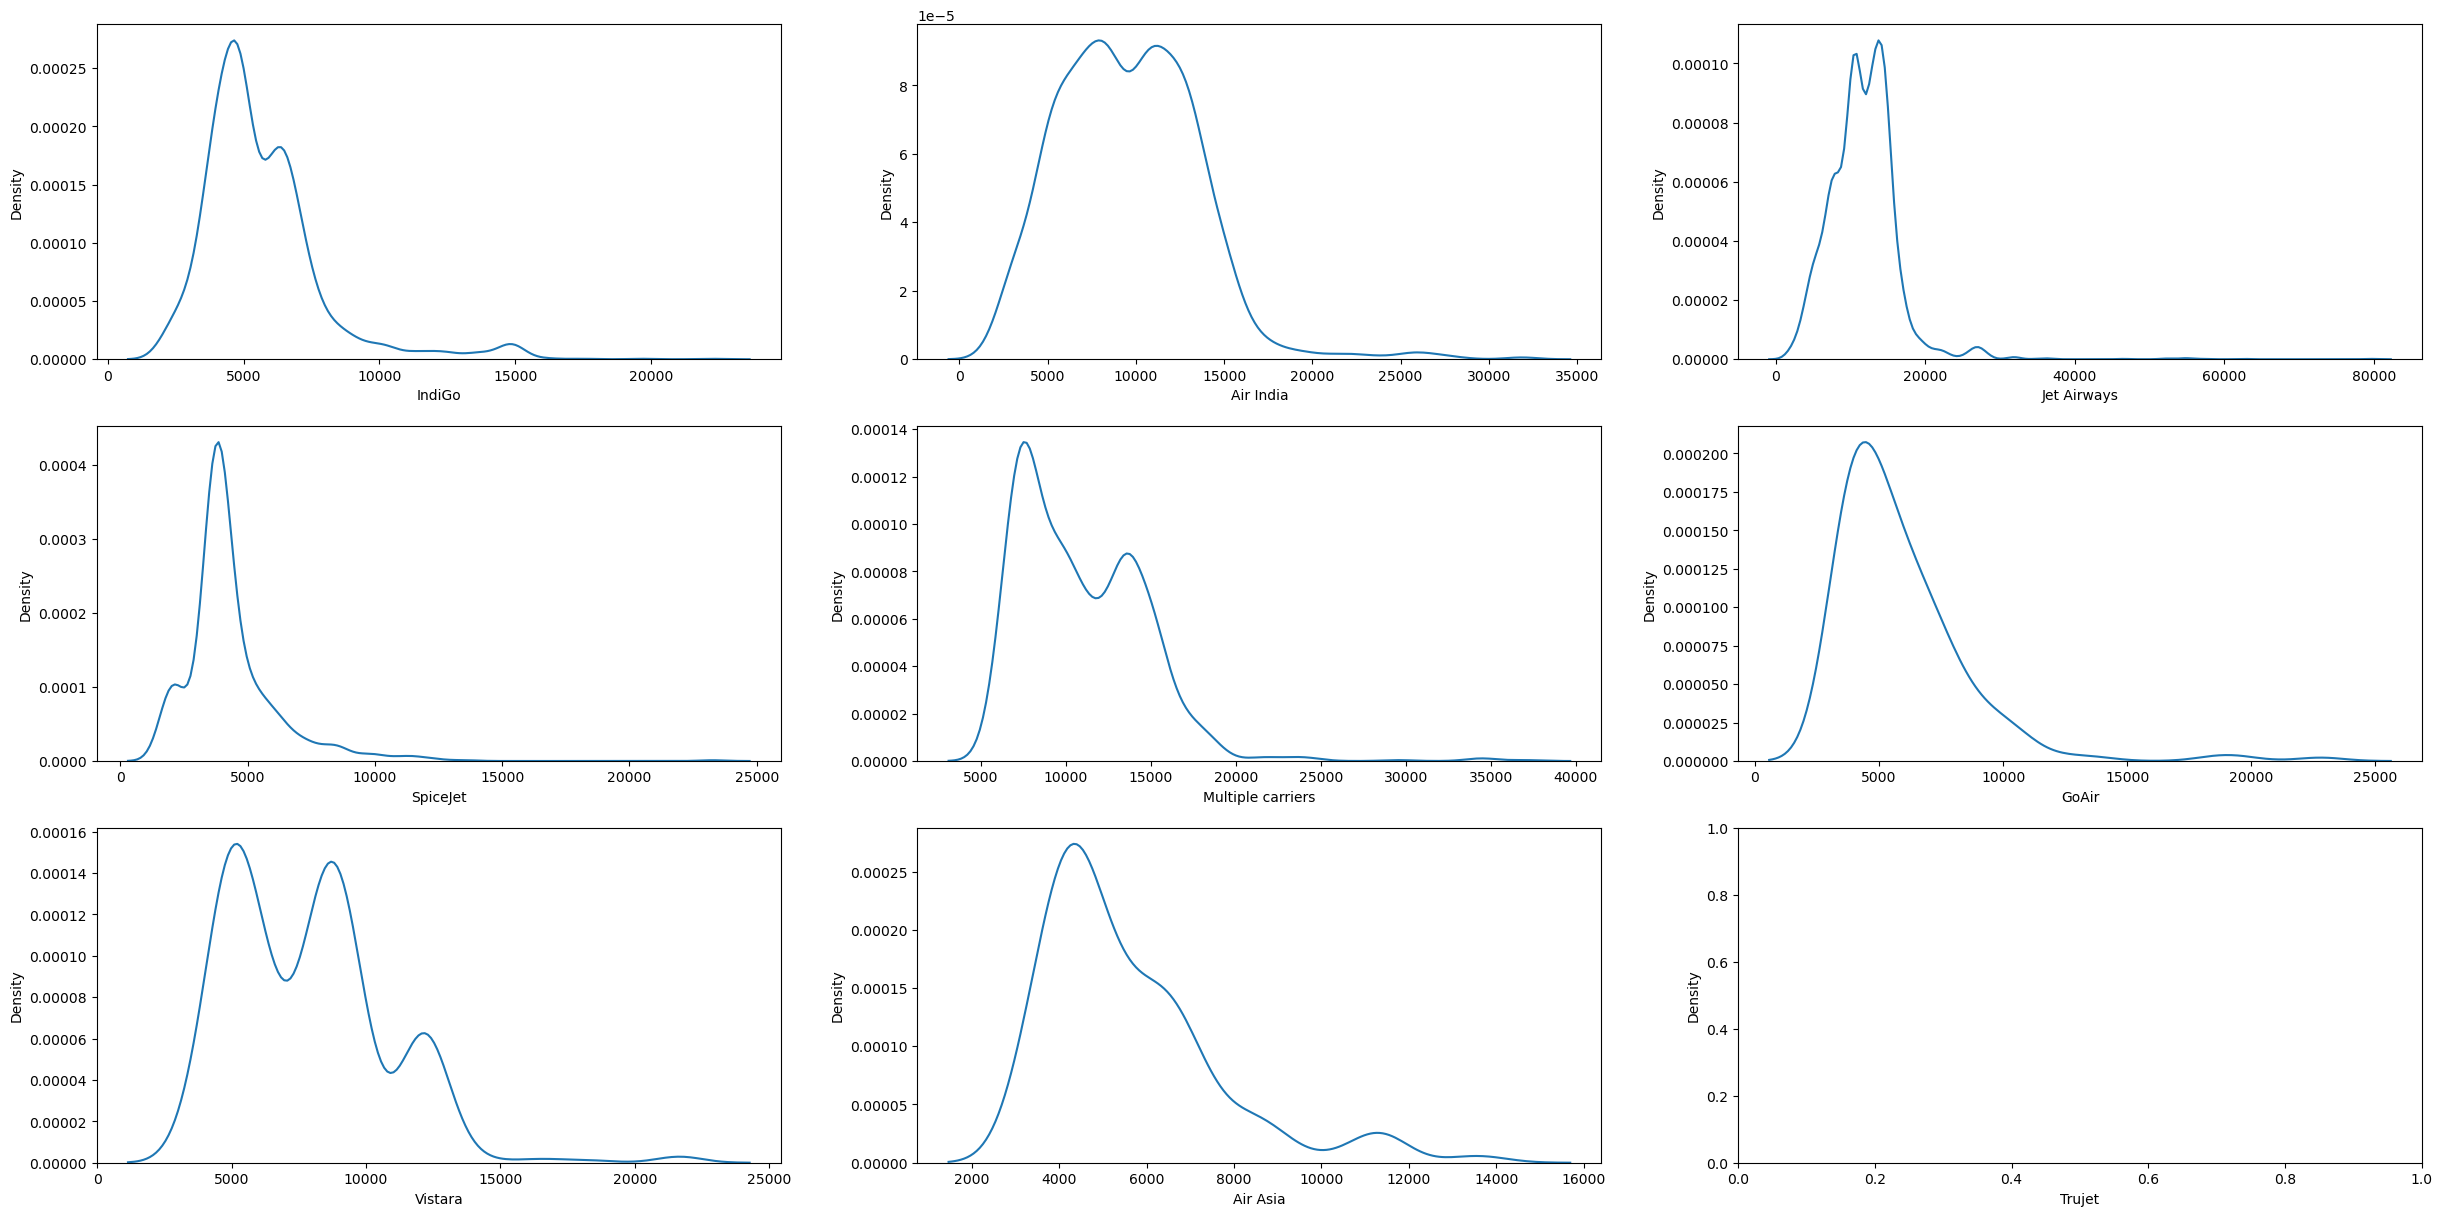

In [48]:
'''[(0, 'IndiGo'),
 (1, 'Air India'),
 (2, 'Jet Airways'),
 (3, 'SpiceJet'),
 (4, 'Multiple carriers'),
 (5, 'GoAir'),
 (6, 'Vistara'),
 (7, 'Air Asia'),
 (8, 'Trujet')]'''



plt.figure(figsize=(30,20))

for i in listOfAirline:
    plt.subplot(4,3,i[0]+1)

    indi = df[df['Airline']==i[1]]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 


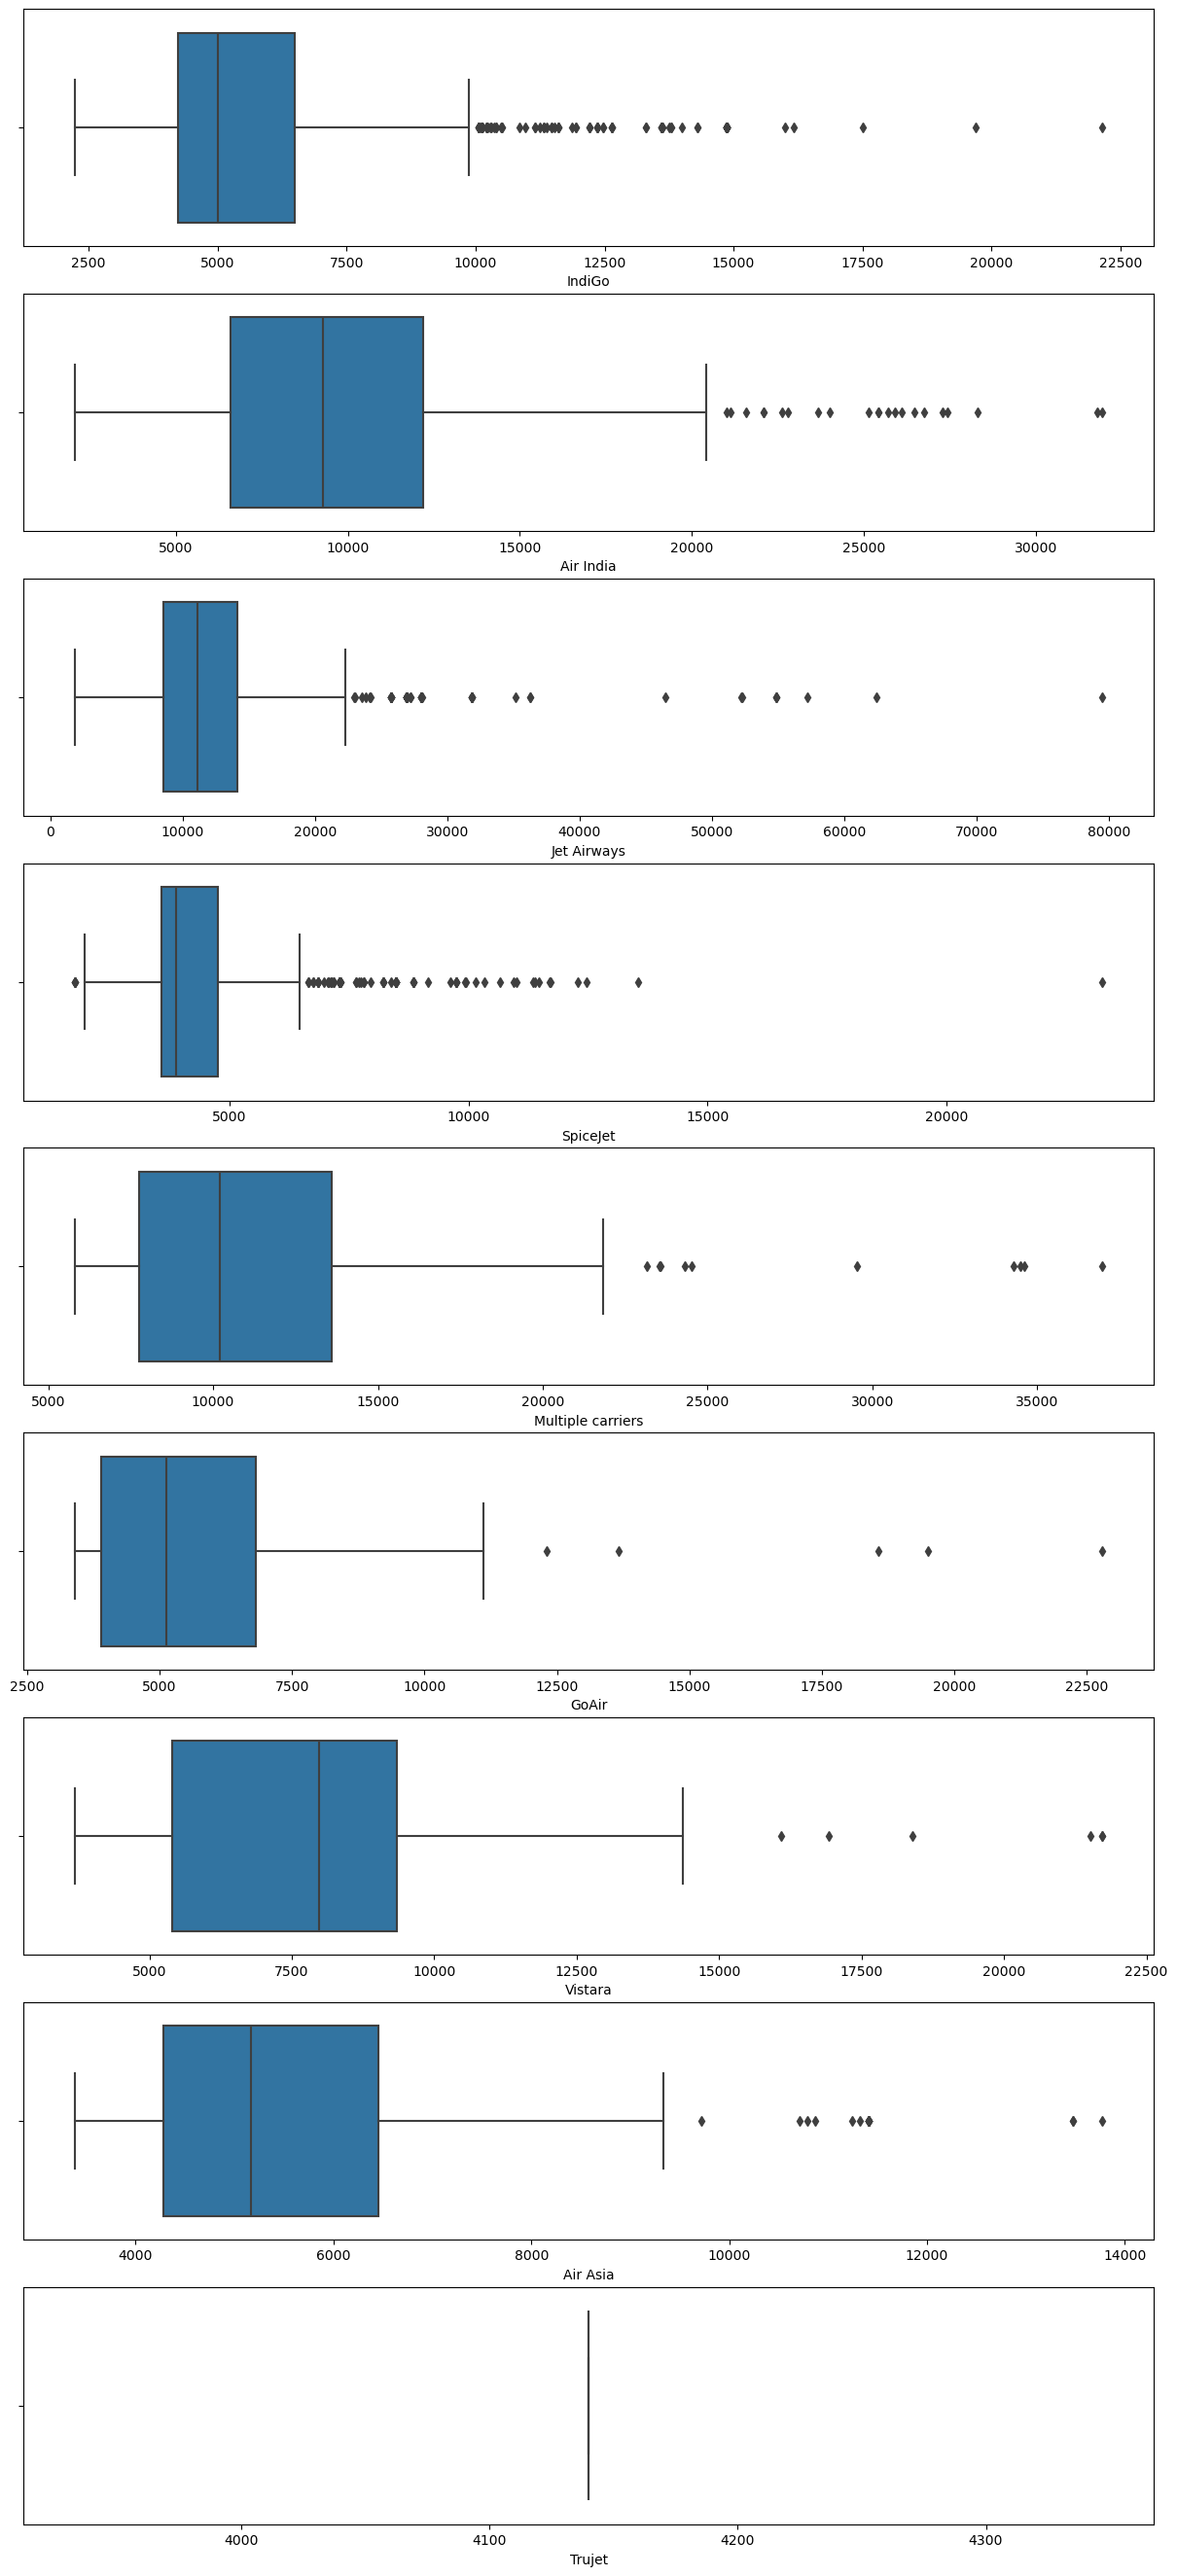

In [49]:
plt.figure(figsize=(15,45))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(12,1,i[0]+1)
    indi = df[df['Airline']==df['Airline'].unique()[i[0]]]
    sns.boxplot(x=indi['Price'])
    plt.xlabel(i[1]) 



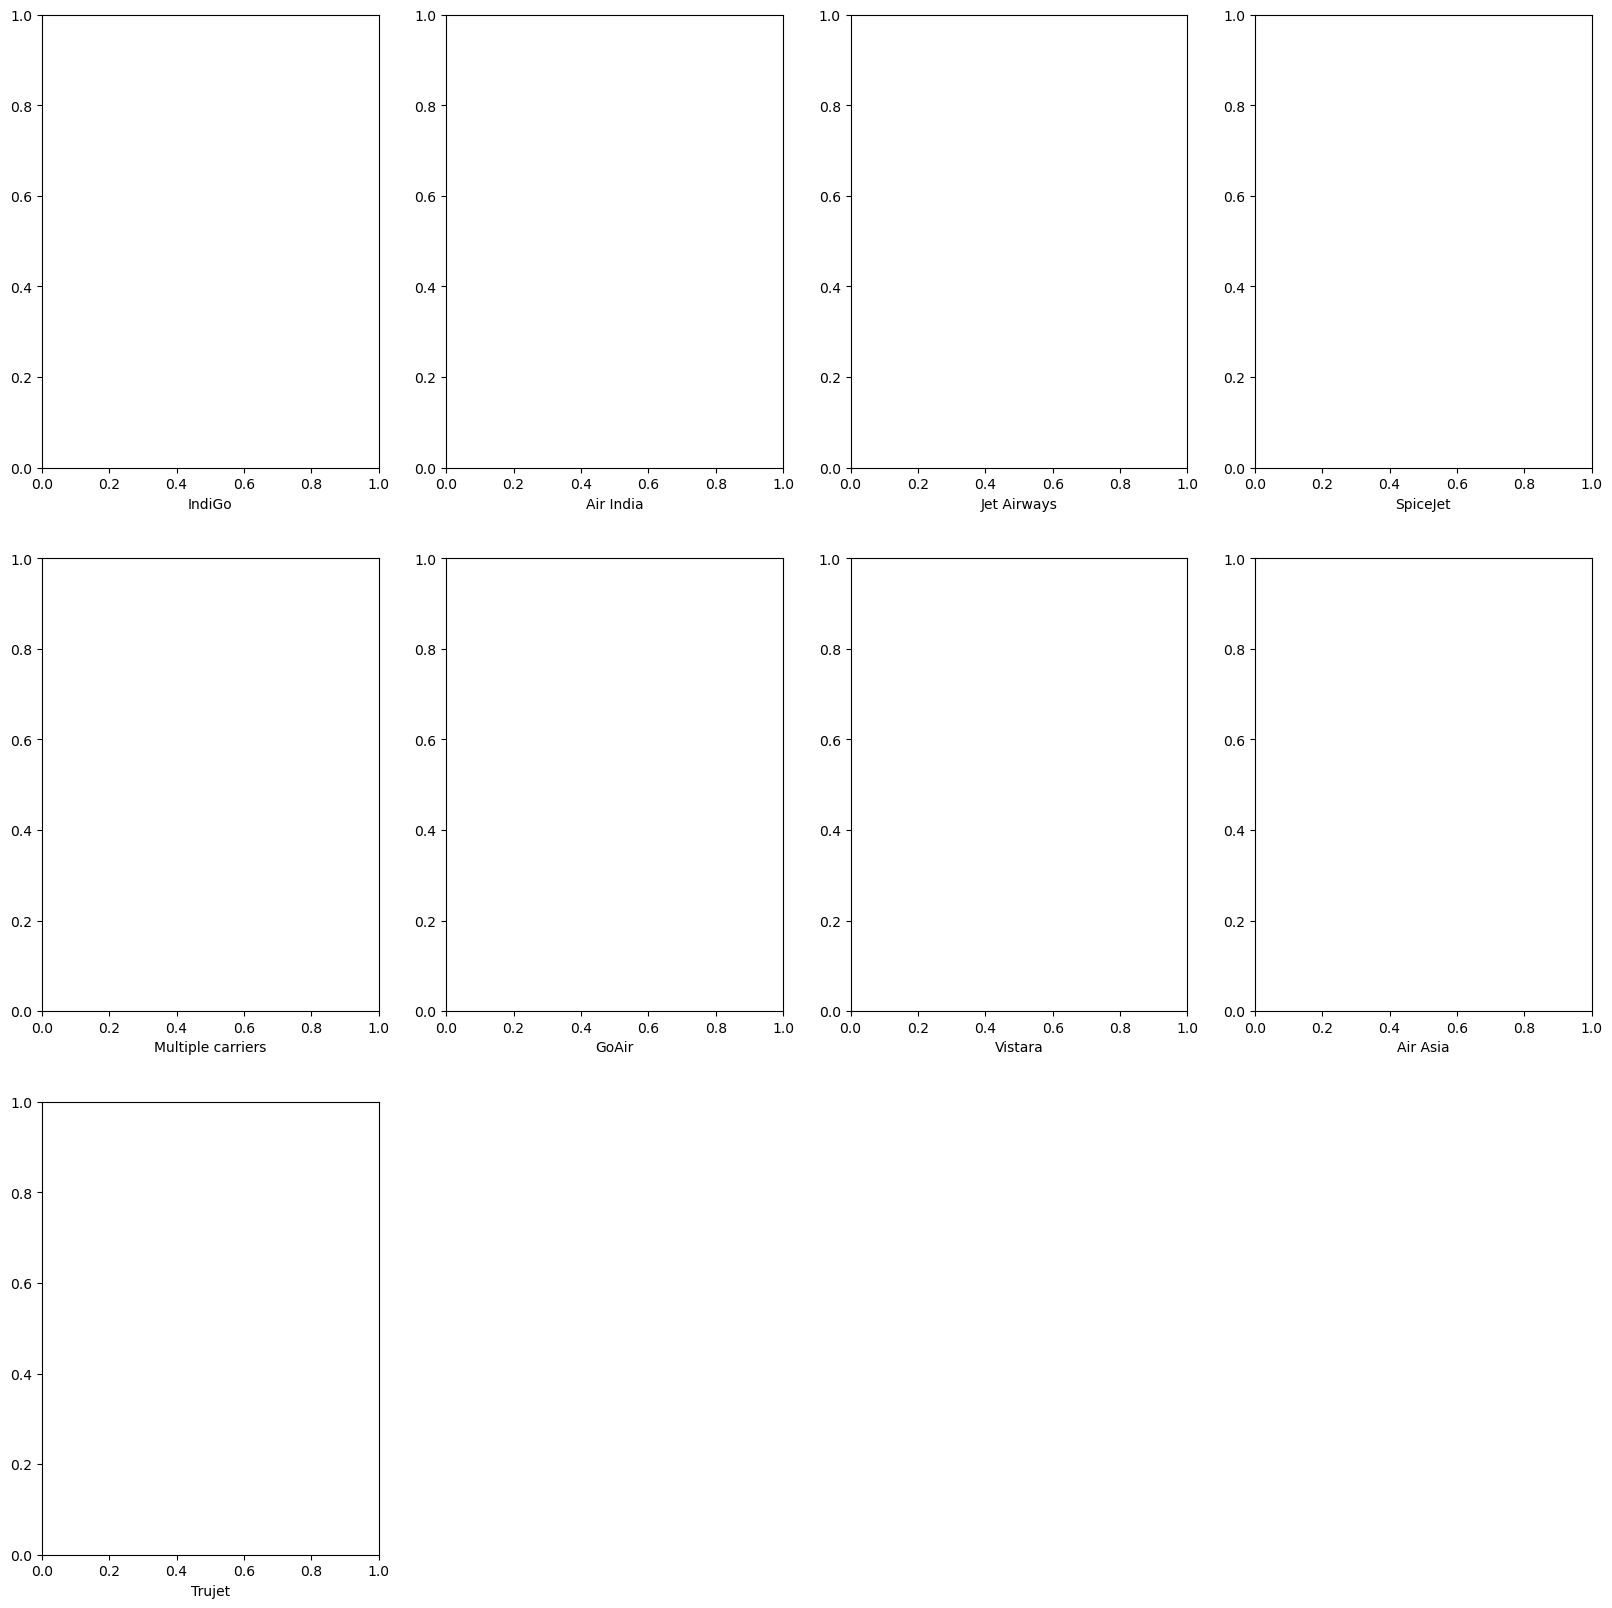

In [50]:
plt.figure(figsize=(20,20))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(3,4,i[0]+1)
    indi = df[df['Airline']==i[0]]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 



In [51]:

df['Date_of_Journey']

# Day
# Month
# Year


0        24-03-2019
1        01-05-2019
2        09-06-2019
3        12-05-2019
4        01-03-2019
            ...    
10677    09-04-2019
10678    27-04-2019
10679    27-04-2019
10680    01-03-2019
10681    09-05-2019
Name: Date_of_Journey, Length: 10462, dtype: object

In [52]:
df['Day'] = pd.to_datetime(df["Date_of_Journey"],format="%d-%m-%Y").dt.day

df['Day']


0        24
1         1
2         9
3        12
4         1
         ..
10677     9
10678    27
10679    27
10680     1
10681     9
Name: Day, Length: 10462, dtype: int64

In [53]:
df['Month'] = pd.to_datetime(df['Date_of_Journey'],format="%d-%m-%Y").dt.month
df['Month']


0        3
1        5
2        6
3        5
4        3
        ..
10677    4
10678    4
10679    4
10680    3
10681    5
Name: Month, Length: 10462, dtype: int64

In [54]:
df['Year'] = pd.to_datetime(df['Date_of_Journey'],format="%d-%m-%Y").dt.year
df['Year']


0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10677    2019
10678    2019
10679    2019
10680    2019
10681    2019
Name: Year, Length: 10462, dtype: int64

In [55]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [56]:

columName = 'Dept_Hour'
columName = columName.split("_")[0]
df[columName+"_Hour"] = pd.to_datetime(df['Dep_Time']).dt.hour
df[columName+"_Hour"]

df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3,2019,22
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6,2019,9
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,8
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11


In [57]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time



In [58]:


df['Dept_Hour'] = pd.to_datetime(df['Dep_Time']).dt.minute
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3,2019,20
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,50
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6,2019,25
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,5
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,55
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,45
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,20
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,30


In [59]:
df['Dept_Minute']=pd.to_datetime(df['Dep_Time']).dt.minute
df



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3,2019,20,20
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,50,50
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6,2019,25,25
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,5,5
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,55,55
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,45,45
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,20,20
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,30,30


In [60]:
df['Arr_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3,2019,20,20,1
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,50,50,13
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6,2019,25,25,4
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,5,5,23
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,50,50,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,55,55,22
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,45,45,23
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,20,20,11
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,30,30,14


In [61]:
df['Arr_Minute']=pd.to_datetime(df['Arrival_Time']).dt.minute

df.head(5)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3,2019,20,20,1,10
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,50,50,13,15
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6,2019,25,25,4,25
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,5,5,23,30
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,50,50,21,35


In [62]:


# 7h 25m
horsToMin = 7*60
horsToMin = horsToMin + 25
horsToMin


445

In [63]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time



In [64]:
df['Duration'].unique()


array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [65]:
values = "50m"
values = values.split(" ")
values


['50m']

In [66]:
df['Duration'].unique()


FirstValue = "2h 55m"

FirstValue = FirstValue.split(" ")[0]
print(FirstValue)

if "h" in FirstValue:
    FirstValue = FirstValue.replace("h","")
    FirstValue = int(FirstValue)*60
    print(FirstValue)

elif 'm' in FirstValue:
    FirstValue = FirstValue.replace('m',"")
    FirstValue = int(FirstValue)
    print(FirstValue)



2h
120


In [67]:
SecondValue = "2h 55m"

SecondValue = SecondValue.split(" ")[1]
print(SecondValue)

SecondValue = SecondValue.replace('m',"")
SecondValue = int(SecondValue)
print(SecondValue)




55m
55


In [68]:
df["hoursMinutes"] = 0
for i in df.index:
    if " " in df.loc[i,'Duration']:
        column1 = df.loc[i,'Duration'].split(" ")[0]
        column2 = df.loc[i,'Duration'].split(" ")[1]
        
        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        if "h" in column2:
            column2 =  (int(column2.replace("h",""))*60)
        elif "m" in column2:
            column2 =  (int(column2.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1 + column2 

    else:
        column1 = df.loc[i,'Duration']

        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1

        
df





,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3,2019,20,20,1,10,170
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,50,50,13,15,445
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6,2019,25,25,4,25,1140
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,5,5,23,30,325
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,50,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,55,55,22,25,150
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,45,45,23,20,155
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,20,20,11,20,180
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,30,30,14,10,160


In [69]:
df = df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1)

df



,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,Banglore,Delhi,BLR ? DEL,non-stop,No info,3897,24,3,2019,20,20,1,10,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,2019,50,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,2019,25,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,2019,5,5,23,30,325
4,IndiGo,Banglore,Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,2019,50,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4107,9,4,2019,55,55,22,25,150
10678,Air India,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4145,27,4,2019,45,45,23,20,155
10679,Jet Airways,Banglore,Delhi,BLR ? DEL,non-stop,No info,7229,27,4,2019,20,20,11,20,180
10680,Vistara,Banglore,Delhi,BLR ? DEL,non-stop,No info,12648,1,3,2019,30,30,14,10,160


In [70]:
df = df.drop(["Route","Additional_Info"], axis = 1)
df


,Airline,Source,Destination,Total_Stops,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,2019,20,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,50,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,25,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,5,5,23,30,325
4,IndiGo,Banglore,Delhi,1 stop,13302,1,3,2019,50,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,2019,55,55,22,25,150
10678,Air India,Kolkata,Banglore,non-stop,4145,27,4,2019,45,45,23,20,155
10679,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,2019,20,20,11,20,180
10680,Vistara,Banglore,Delhi,non-stop,12648,1,3,2019,30,30,14,10,160


In [71]:
df = df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Day','Month', 'Year',
                         'Dept_Hour', 'Dept_Minute', 'Arr_Hour', 'Arr_Minute','hoursMinutes','Price',]]

df


,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Price
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,20,20,1,10,170,3897
1,Air India,Kolkata,Banglore,2 stops,1,5,2019,50,50,13,15,445,7662
2,Jet Airways,Delhi,Cochin,2 stops,9,6,2019,25,25,4,25,1140,13882
3,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,5,5,23,30,325,6218
4,IndiGo,Banglore,Delhi,1 stop,1,3,2019,50,50,21,35,285,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,non-stop,9,4,2019,55,55,22,25,150,4107
10678,Air India,Kolkata,Banglore,non-stop,27,4,2019,45,45,23,20,155,4145
10679,Jet Airways,Banglore,Delhi,non-stop,27,4,2019,20,20,11,20,180,7229
10680,Vistara,Banglore,Delhi,non-stop,1,3,2019,30,30,14,10,160,12648


In [72]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [73]:
df.columns
data_train = df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Day','Month', 'Year',
                         'Dept_Hour', 'Dept_Minute', 'Arr_Hour', 'Arr_Minute','hoursMinutes','Price',]]

data_train

,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Price
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,20,20,1,10,170,3897
1,Air India,Kolkata,Banglore,2 stops,1,5,2019,50,50,13,15,445,7662
2,Jet Airways,Delhi,Cochin,2 stops,9,6,2019,25,25,4,25,1140,13882
3,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,5,5,23,30,325,6218
4,IndiGo,Banglore,Delhi,1 stop,1,3,2019,50,50,21,35,285,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,non-stop,9,4,2019,55,55,22,25,150,4107
10678,Air India,Kolkata,Banglore,non-stop,27,4,2019,45,45,23,20,155,4145
10679,Jet Airways,Banglore,Delhi,non-stop,27,4,2019,20,20,11,20,180,7229
10680,Vistara,Banglore,Delhi,non-stop,1,3,2019,30,30,14,10,160,12648


In [74]:
# target Feature
y = data_train['Price']
y.head()



0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [75]:
df['Airline'].unique()


array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [76]:
'''airDataSet = df[df['Airline']=="IndiGo"]
airDataSet


plt.figure(figsize=(5,5))
sns.boxplot(y=airDataSet['Price'])
plt.xlabel('IndiGo')

q1 = airDataSet['Price'].quantile(0.25)
q3 = airDataSet['Price'].quantile(0.70)

print(q1)
print(q3)
IQR = q3-q1
print(IQR)

lowerLimit = q1-IQR*1.5
upperLimit = q3+IQR*1.5

print("lowerLimit: ",lowerLimit)
print("upperLimit: ", upperLimit)

lowerLimitIndex = airDataSet[airDataSet['Price']<=lowerLimit].index
upperLimitIndex = airDataSet[airDataSet['Price']>=upperLimit].index


airDataSet.drop(index=lowerLimitIndex,axis=0,inplace=True)
airDataSet.drop(index=upperLimitIndex,axis=0,inplace=True)

airDataSet

plt.figure(figsize=(5,5))
sns.boxplot(y=airDataSet['Price'])
plt.xlabel('IndiGo')

'''

'airDataSet = df[df[\'Airline\']=="IndiGo"]\nairDataSet\n\n\nplt.figure(figsize=(5,5))\nsns.boxplot(y=airDataSet[\'Price\'])\nplt.xlabel(\'IndiGo\')\n\nq1 = airDataSet[\'Price\'].quantile(0.25)\nq3 = airDataSet[\'Price\'].quantile(0.70)\n\nprint(q1)\nprint(q3)\nIQR = q3-q1\nprint(IQR)\n\nlowerLimit = q1-IQR*1.5\nupperLimit = q3+IQR*1.5\n\nprint("lowerLimit: ",lowerLimit)\nprint("upperLimit: ", upperLimit)\n\nlowerLimitIndex = airDataSet[airDataSet[\'Price\']<=lowerLimit].index\nupperLimitIndex = airDataSet[airDataSet[\'Price\']>=upperLimit].index\n\n\nairDataSet.drop(index=lowerLimitIndex,axis=0,inplace=True)\nairDataSet.drop(index=upperLimitIndex,axis=0,inplace=True)\n\nairDataSet\n\nplt.figure(figsize=(5,5))\nsns.boxplot(y=airDataSet[\'Price\'])\nplt.xlabel(\'IndiGo\')\n\n'

,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Price
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,20,20,1,10,170,3897
3,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,5,5,23,30,325,6218
11,IndiGo,Kolkata,Banglore,non-stop,18,4,2019,20,20,22,55,155,4174
14,IndiGo,Kolkata,Banglore,non-stop,24,4,2019,15,15,19,50,155,4804
22,IndiGo,Banglore,Delhi,non-stop,3,4,2019,0,0,6,50,170,3943
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10503,Air Asia,Delhi,Cochin,1 stop,12,6,2019,55,55,22,25,870,6152
10549,Air Asia,Kolkata,Banglore,non-stop,12,3,2019,35,35,22,5,150,4384
10589,Air Asia,Banglore,Delhi,non-stop,24,3,2019,25,25,2,10,165,3383
10677,Air Asia,Kolkata,Banglore,non-stop,9,4,2019,55,55,22,25,150,4107


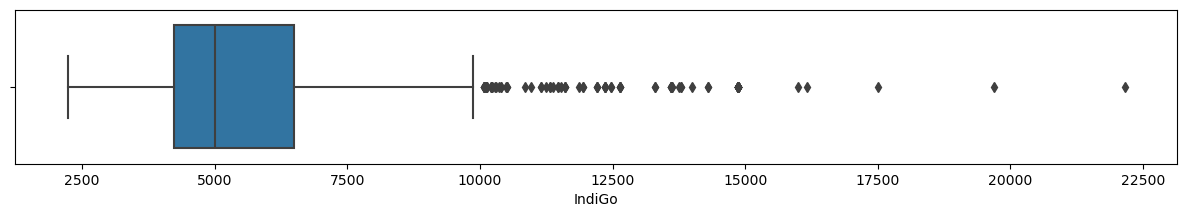

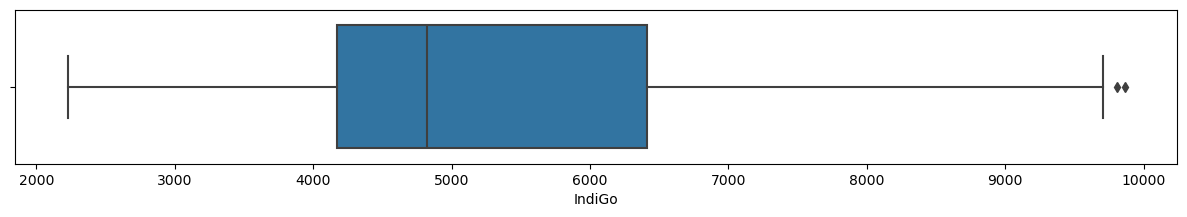

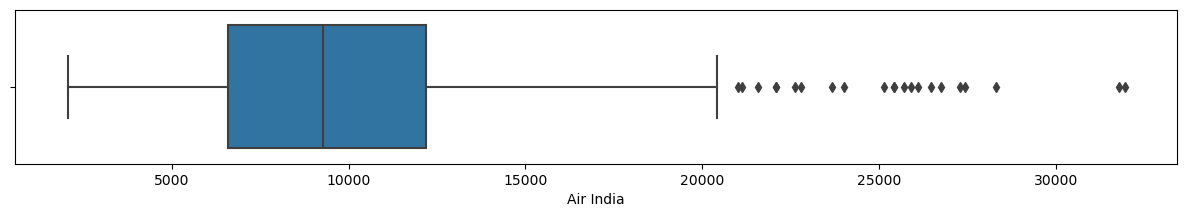

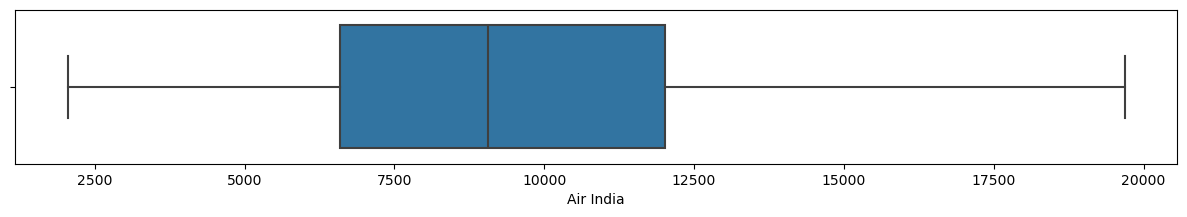

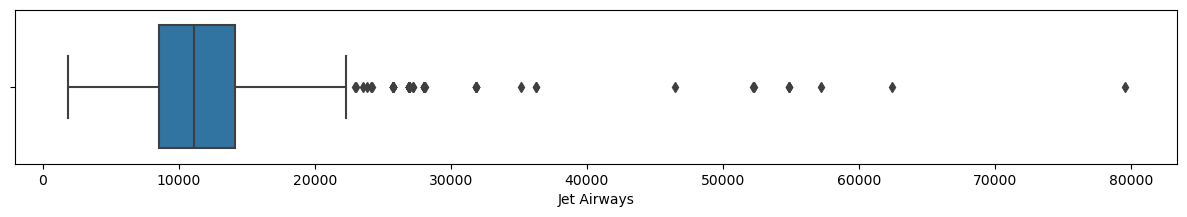

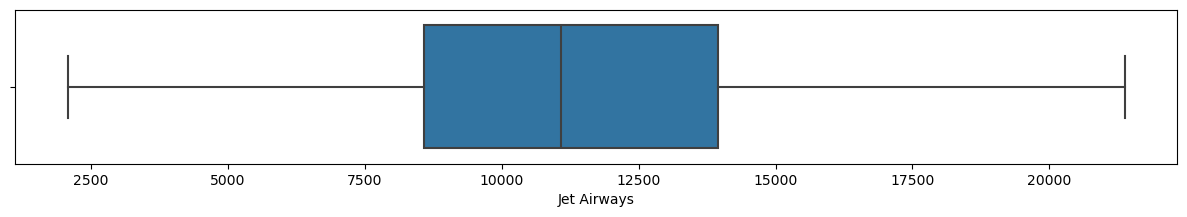

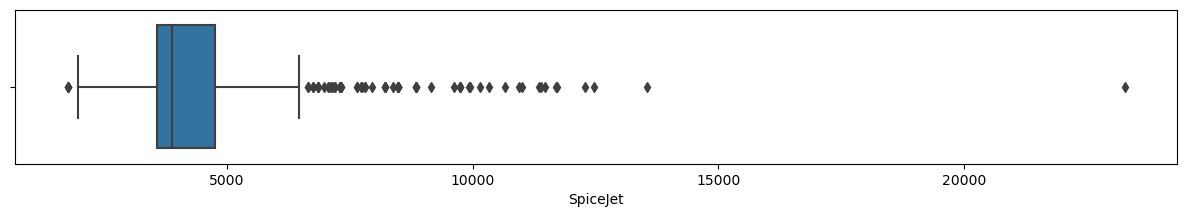

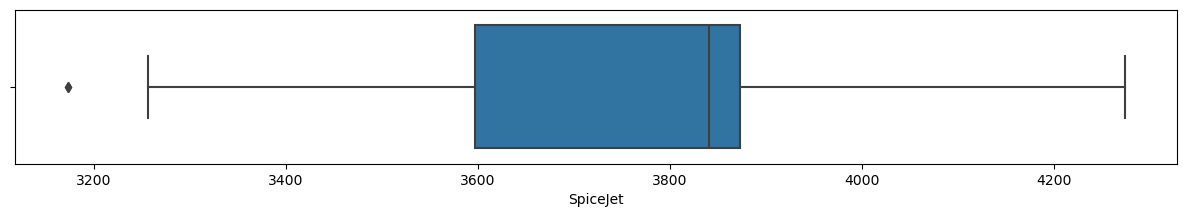

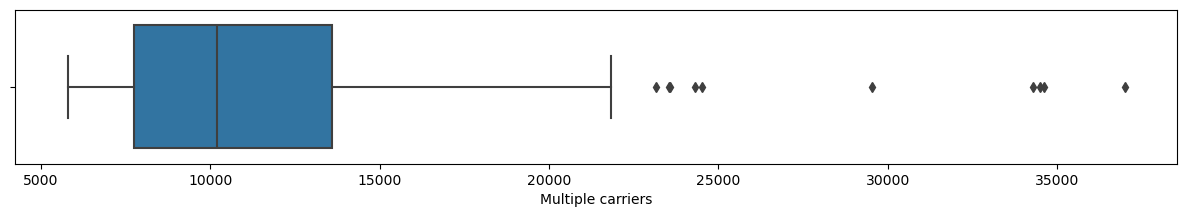

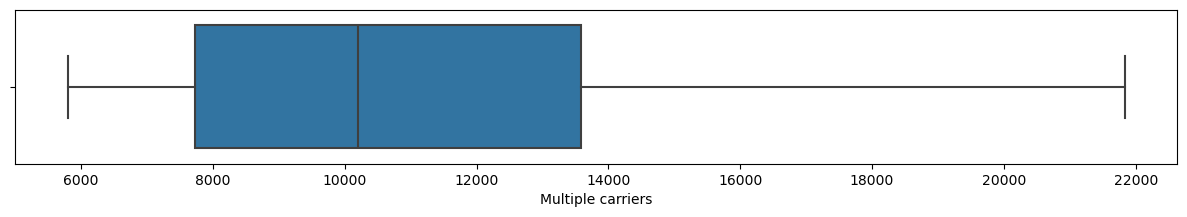

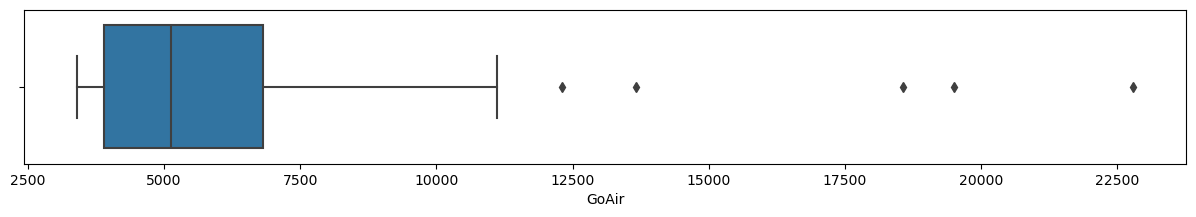

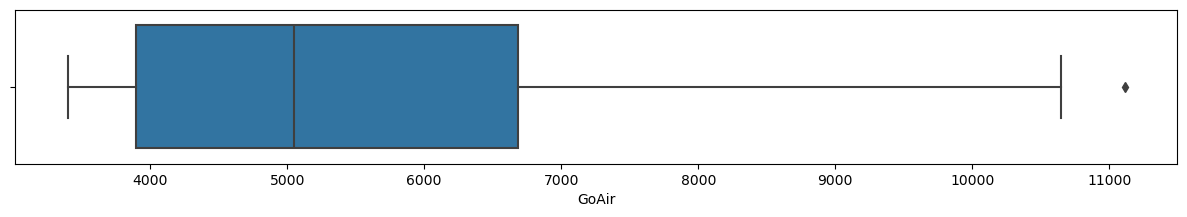

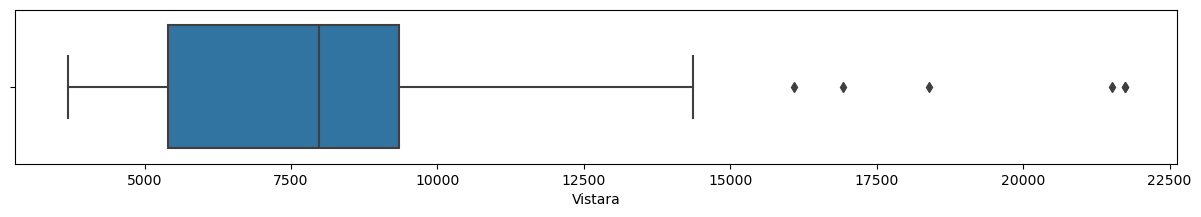

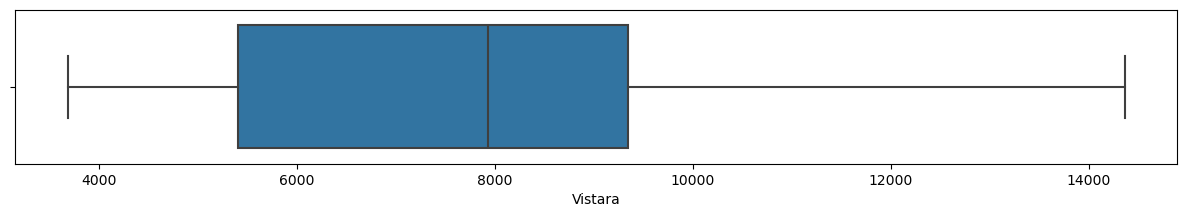

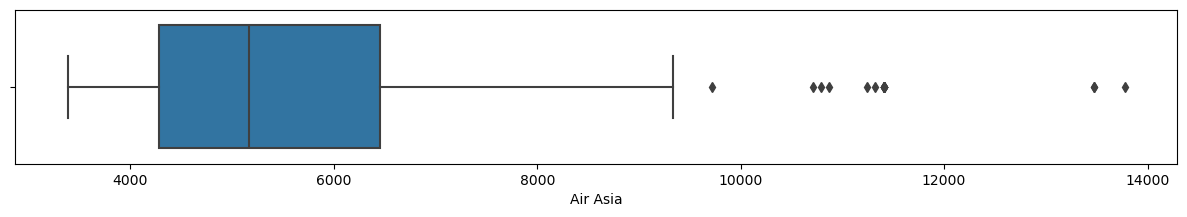

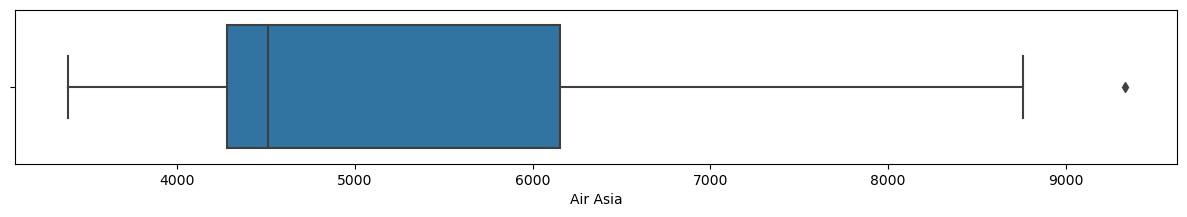

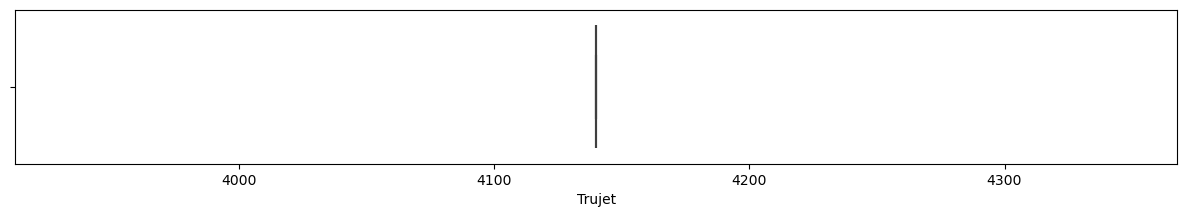

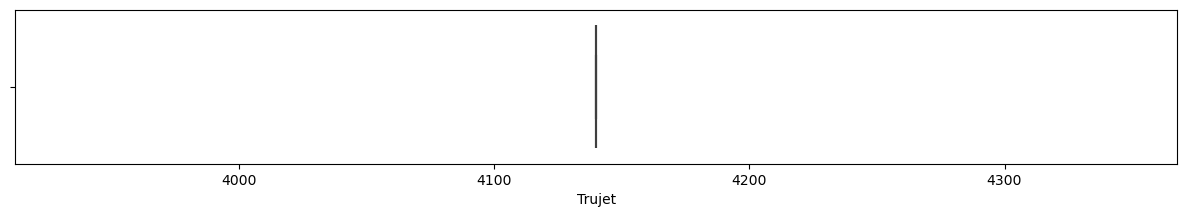

In [77]:
# Remove Outlier


df['Airline'].unique()

airlineName = { 'IndiGo':      [0.25,0.75],
                "Air India":   [0.27,0.75],
                'Jet Airways': [0.27,0.75],
                'SpiceJet':    [0.20,0.45],
                'Multiple carriers':[0.20,0.80],
                'GoAir':       [0.20,0.75],
                'Vistara':     [0.20,0.75],
                'Air Asia':    [0.25,0.75],
                'Trujet':       [0,0]

              }


final_df = pd.DataFrame(columns=list(df.columns))
final_df
list(df.columns)

import pandas as pd


for key,value in airlineName.items():
    airDataSet = ""
    airDataSet = df[df['Airline'] == key]
    airDataSet
    plt.figure(figsize=(15,2))
    sns.boxplot(x=airDataSet['Price'])
    plt.xlabel(key)
    q1 = airDataSet['Price'].quantile(value[0])
    q3 = airDataSet['Price'].quantile(value[1])
    IQR = q3-q1
    lowerLimit = q1-IQR*1.5
    upperLimit = q3+IQR*1.5
    lowerLimitIndex = airDataSet[airDataSet['Price']<=lowerLimit].index
    upperLimitIndex = airDataSet[airDataSet['Price']>=upperLimit].index
    if airDataSet.shape[0] > 5 : 
        airDataSet.drop(lowerLimitIndex,axis=0,inplace=True)
        airDataSet.drop(upperLimitIndex,axis=0,inplace=True)
    else:
        pass

    df[df.index.isin([2878])]

    plt.figure(figsize=(15,2))
    sns.boxplot(x=airDataSet['Price'])
    plt.xlabel(key)

    
    #airDataSet1 = airDataSet1.append(airDataSet, ignore_index=True)  # ignore_index=True resets the index

    final_df = pd.concat([final_df, airDataSet], axis=0)  # axis=0 is the default and means appending vertically


    
final_df


In [78]:

final_df = final_df.reset_index(drop=True)
final_df


,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Price
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,20,20,1,10,170,3897
1,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,5,5,23,30,325,6218
2,IndiGo,Kolkata,Banglore,non-stop,18,4,2019,20,20,22,55,155,4174
3,IndiGo,Kolkata,Banglore,non-stop,24,4,2019,15,15,19,50,155,4804
4,IndiGo,Banglore,Delhi,non-stop,3,4,2019,0,0,6,50,170,3943
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9819,Air Asia,Delhi,Cochin,1 stop,12,6,2019,55,55,22,25,870,6152
9820,Air Asia,Kolkata,Banglore,non-stop,12,3,2019,35,35,22,5,150,4384
9821,Air Asia,Banglore,Delhi,non-stop,24,3,2019,25,25,2,10,165,3383
9822,Air Asia,Kolkata,Banglore,non-stop,9,4,2019,55,55,22,25,150,4107


In [79]:
# independat Feature
X = final_df.drop(['Price'],axis=1)
X 


,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,20,20,1,10,170
1,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,5,5,23,30,325
2,IndiGo,Kolkata,Banglore,non-stop,18,4,2019,20,20,22,55,155
3,IndiGo,Kolkata,Banglore,non-stop,24,4,2019,15,15,19,50,155
4,IndiGo,Banglore,Delhi,non-stop,3,4,2019,0,0,6,50,170
...,...,...,...,...,...,...,...,...,...,...,...,...
9819,Air Asia,Delhi,Cochin,1 stop,12,6,2019,55,55,22,25,870
9820,Air Asia,Kolkata,Banglore,non-stop,12,3,2019,35,35,22,5,150
9821,Air Asia,Banglore,Delhi,non-stop,24,3,2019,25,25,2,10,165
9822,Air Asia,Kolkata,Banglore,non-stop,9,4,2019,55,55,22,25,150


In [80]:
# Dependant Feature
y = final_df['Price']
y


0       3897
1       6218
2       4174
3       4804
4       3943
        ... 
9819    6152
9820    4384
9821    3383
9822    4107
9823    4140
Name: Price, Length: 9824, dtype: object

In [81]:

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(independant Feature, DependantFeature, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train



X_train


,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
3206,Air India,Mumbai,Hyderabad,2 stops,12,3,2019,40,40,9,10,810
1052,IndiGo,Delhi,Cochin,1 stop,9,6,2019,35,35,21,0,625
696,IndiGo,Delhi,Cochin,1 stop,21,3,2019,0,0,7,45,345
1597,IndiGo,Delhi,Cochin,non-stop,1,4,2019,20,20,17,35,195
8,IndiGo,Delhi,Cochin,1 stop,27,6,2019,35,35,21,0,625
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Jet Airways,Banglore,Delhi,1 stop,6,3,2019,55,55,23,0,845
5191,Jet Airways,Delhi,Cochin,1 stop,6,3,2019,55,55,4,25,870
5390,Jet Airways,Kolkata,Banglore,1 stop,21,5,2019,0,0,22,35,1595
860,IndiGo,Delhi,Cochin,1 stop,9,3,2019,35,35,16,10,515


# Encoding and Scaling


In [82]:
# Import all required Liabraries
# import one hot encoding and ordinal Encoding 
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
# import scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler



# import coulum transformer and pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline



In [83]:
X_train.head(3).T


,3206,1052,696
Airline,Air India,IndiGo,IndiGo
Source,Mumbai,Delhi,Delhi
Destination,Hyderabad,Cochin,Cochin
Total_Stops,2 stops,1 stop,1 stop
Day,12,9,21
Month,3,6,3
Year,2019,2019,2019
Dept_Hour,40,35,0
Dept_Minute,40,35,0
Arr_Hour,9,21,7


In [84]:
# Create Function to for Encoding and Scalling

def methodPreprocessing():
    trf1 = ColumnTransformer([
        ('OneHot',OneHotEncoder(drop='first',handle_unknown='ignore'),[0,1,2])],remainder='passthrough')
    
    trf2 = ColumnTransformer([
        ('Ordinal',OrdinalEncoder(categories=[['non-stop', '1 stop', '2 stops', '3 stops', '4 stops']]),[16])]
         ,remainder='passthrough')
    
    trf3 = ColumnTransformer([
        ('scale', StandardScaler(), slice(25))
    ])
    
    pipe  = make_pipeline(trf1,trf2,trf3)
    return pipe

pipe = methodPreprocessing()



In [85]:
# for train Data

X_train = pipe.fit_transform(X_train)
X_train

pd.DataFrame(X_train.T)


,0,1,2,3,4,5,6,7,8,9,...,7849,7850,7851,7852,7853,7854,7855,7856,7857,7858
0,1.783910,0.282705,0.282705,-1.218499,0.282705,0.282705,-1.218499,1.783910,-1.218499,0.282705,...,0.282705,0.282705,0.282705,-1.218499,1.783910,0.282705,0.282705,0.282705,0.282705,-1.218499
1,2.202686,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,...,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991
2,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,...,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964
3,-0.493869,2.024830,2.024830,2.024830,2.024830,-0.493869,2.024830,-0.493869,2.024830,2.024830,...,-0.493869,-0.493869,-0.493869,2.024830,-0.493869,-0.493869,-0.493869,-0.493869,2.024830,-0.493869
4,-0.759504,-0.759504,-0.759504,-0.759504,-0.759504,1.316649,-0.759504,1.316649,-0.759504,-0.759504,...,-0.759504,1.316649,1.316649,-0.759504,1.316649,1.316649,1.316649,1.316649,-0.759504,-0.759504
5,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,...,2.669681,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577
6,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,...,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,4.618085
7,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,...,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281
8,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,...,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031
9,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,5.127201,-0.195038,...,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038


In [86]:
# for test Data
X_test = pipe.transform(X_test)
print()
pd.DataFrame(X_test).T


,0,1,2,3,4,5,6,7,8,9,...,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964
0,0.282705,-1.218499,0.282705,-1.218499,-1.218499,0.282705,0.282705,1.783910,0.282705,0.282705,...,0.282705,-1.218499,0.282705,0.282705,0.282705,0.282705,0.282705,-1.218499,-1.218499,1.783910
1,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,...,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,-0.453991,2.202686,-0.453991,-0.453991
2,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,...,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964,-0.139964
3,-0.493869,-0.493869,2.024830,2.024830,2.024830,-0.493869,-0.493869,-0.493869,-0.493869,-0.493869,...,-0.493869,2.024830,-0.493869,-0.493869,-0.493869,-0.493869,-0.493869,-0.493869,2.024830,-0.493869
4,1.316649,-0.759504,-0.759504,-0.759504,-0.759504,1.316649,1.316649,1.316649,1.316649,1.316649,...,1.316649,-0.759504,-0.759504,-0.759504,1.316649,1.316649,-0.759504,-0.759504,-0.759504,1.316649
5,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,-0.374577,...,-0.374577,-0.374577,2.669681,2.669681,-0.374577,-0.374577,2.669681,-0.374577,-0.374577,-0.374577
6,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,...,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540,-0.216540
7,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,...,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281
8,-0.226031,4.424172,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,...,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031,-0.226031
9,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,...,-0.195038,5.127201,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038,-0.195038


# Model Training

In [87]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()

linearRegression.fit(X_train,y_train) # Model Train



LinearRegression()

# Train Data

In [88]:
X_train_pred = linearRegression.predict(X_train)
X_train_pred


array([10463.56882009,  6842.76662676,  7636.56600982, ...,
       11209.22947829,  7994.60677471,  3682.38706898])

In [89]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('MSE:',metrics.mean_squared_error(y_train,X_train_pred))
print('MAE:',metrics.mean_absolute_error(y_train,X_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,X_train_pred)))


MSE: 5399557.415382666
MAE: 1746.550910756878
RMSE: 2323.6947767257784


In [90]:
## R Square and Adjusted R Square
from sklearn.metrics import r2_score

r2 = metrics.r2_score(y_train,X_train_pred)
r2

## Adjusted R square
#display adjusted R-squared

aR2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

print('r2  : ',r2)
print('aR2 : ', aR2)


r2  :  0.6581171493225457
aR2 :  0.6570259874092383


In [91]:
error_Train = (y_train-X_train_pred)
error_Train


3206     1183.43118
1052    -528.766627
696     -1210.56601
1597    -626.226394
8        -96.266627
           ...     
5734    4838.468603
5191    1368.495333
5390    -365.229478
860    -1320.606775
7270     158.612931
Name: Price, Length: 7859, dtype: object

<Axes: xlabel='Price', ylabel='Density'>

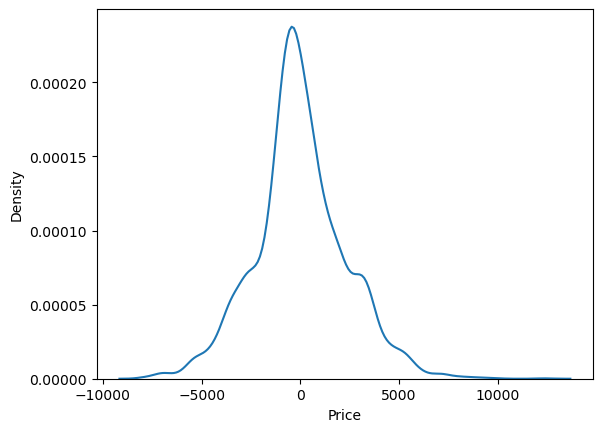

In [92]:
# Normally distribution of Errors:
sns.kdeplot(error_Train)


<Axes: ylabel='Price'>

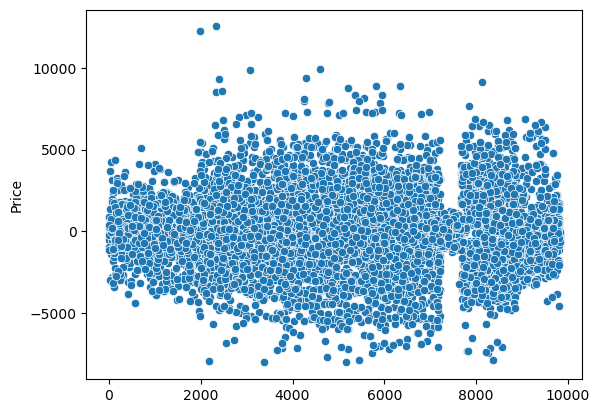

In [93]:
# Homoscedasticity (Constant Variance) of residuals(Error): 
sns.scatterplot(error_Train)


# On Test Data

In [94]:
y_Test_pred = linearRegression.predict(X_test)
y_Test_pred


array([11482.10243919,  6159.25312423,  7348.13550946, ...,
        6108.25847036,  3963.26916261, 12908.65395751])

In [109]:
'''Preformance Metrix'''
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np
from sklearn import metrics

def print_metrics(y, y_Pred):
    mse = metrics.mean_squared_error(y, y_Pred)
    mae = metrics.mean_absolute_error(y, y_Pred)
    rmse = np.sqrt(mse)
    
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')


In [110]:
from sklearn.metrics import r2_score


def calculate_r2_and_adjusted_r2(y, y_pred, X):
    r2 = r2_score(y, y_pred)
    n = len(y)  # Number of observations
    p = X.shape[1]  # Number of predictors (features)
    # Adjusted R² formula
    aR2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    print('r2  : ', r2)
    print('aR2 : ', aR2)

calculate_r2_and_adjusted_r2(y_test, y_Test_pred, X_test)


r2  :  0.6504500552874604
aR2 :  0.6459432225810068


In [97]:
error = (y_test-y_Test_pred)
error


6913    -779.102439
9372   -1491.253124
647    -1649.135509
1393     597.252222
360       346.74153
           ...     
6954    2082.412331
7735    1075.121105
3370       12.74153
461      840.730837
4375   -2540.653958
Name: Price, Length: 1965, dtype: object

<Axes: xlabel='Price', ylabel='Density'>

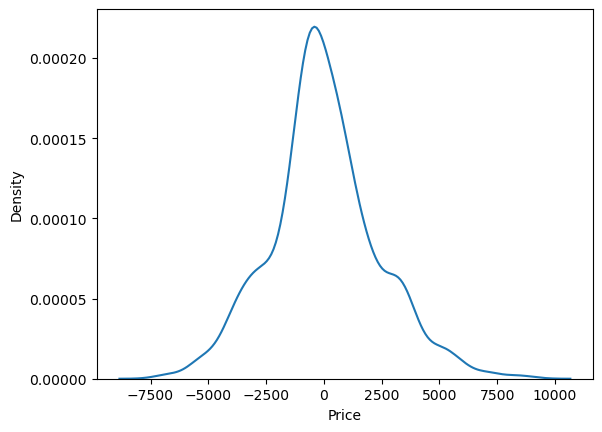

In [98]:
# Normally distribution of Errors:
sns.kdeplot(error)


<Axes: ylabel='Price'>

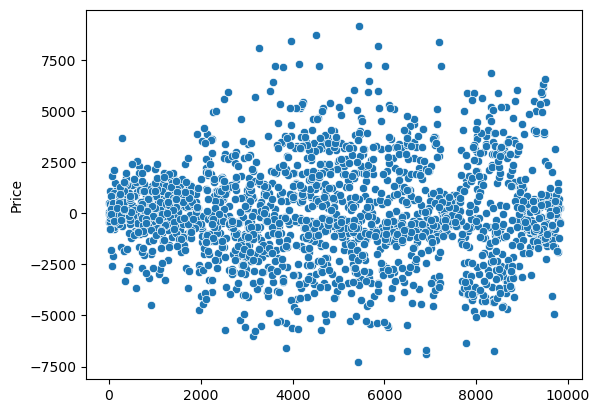

In [99]:
# Homoscedasticity (Constant Variance) of residuals(Error): 
sns.scatterplot(error)


In [100]:
import pickle

with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(linearRegression, file)

print("Model saved as 'linear_regression_model.pkl'")


Model saved as 'linear_regression_model.pkl'


In [101]:
import numpy as np

# Your test data
predictionData_01 = np.array([[0.29513, -0.439141, -0.139609, -0.488058, 1.340918, -0.356351, 
                      -0.290428, -0.010932, -0.224335, -0.192486, -0.837887, -0.612842, 
                      -0.269325, -0.837887, 1.932945, -0.269325, -0.192486, -0.889078, 
                      -1.468318, 0, -1.290458, -1.290458, -0.778862, -0.594844, 1.650211]])

with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


# Make predictions using the loaded model
predictions = loaded_model.predict(predictionData_01)

# Print the predictions
print("Predictions:", float(predictions))


Predictions: 184659169862793.12


In [ ]:
X_train


In [106]:
# Build the model using Lasso Regression

from sklearn.linear_model import Lasso
lasso_Model = Lasso()

lasso_Model.fit(X_train,y_train)


Lasso()

In [107]:
# get the prediction based on the Train Data
y_train_pred = lasso_Model.predict(X_train)
y_train_pred


array([10422.47320681,  6830.67748633,  7661.33686827, ...,
       11278.83876497,  7982.01173955,  3695.64485287])

In [108]:
# get the prediction based on the Test Data

y_Test_pred = lasso_Model.predict(X_test)
y_Test_pred



array([11525.6656589 ,  6072.01557938,  7377.74953439, ...,
        6063.30744299,  3977.58534646, 12915.58739432])

In [111]:
# Predict MSE, MAE, RMSE on Lasso Model Training Data
print_metrics(y_train, y_train_pred)


MSE: 5397501.015409541
MAE: 1746.2556484551606
RMSE: 2323.252249629717


In [113]:
# Predict MSE, MAE, RMSE on Lasso Model Testing Data
print_metrics(y_test, y_Test_pred)


MSE: 5518063.120151644
MAE: 1774.367080169726
RMSE: 2349.0557933245527


In [114]:
# Predict r2 and adjusted_r2 on Lasso Model Training Data
calculate_r2_and_adjusted_r2(y_train, y_train_pred, X_train)


r2  :  0.6582473540469074
aR2 :  0.6571566076982762


In [115]:
# Predict r2 and adjusted_r2 on Lasso Model testing Data
calculate_r2_and_adjusted_r2(y_test, y_Test_pred, X_test)


r2  :  0.6504500552874604
aR2 :  0.6459432225810068


In [ ]:
# Linear Regression
# Ridge Regression
# Lasso Regression
# ElasticNet


In [121]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression


modelDict = {'lasso': Lasso(),
            'ridge' : Ridge(),
             'linear':LinearRegression()
            }

modelDictWithDetails = {'VALUES':['MSE','MAE','RMSE','r2','aR2'],
                        'lasso': [],
                        'ridge' : [],
                        'linear':[]}

k=1
for key, value in modelDict.items():

    model=value
    print()
    print()
    print(model)
    print()

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred
    

    print()
    print()
    
    residuals = y_test-y_pred
    residuals = residuals.astype(float)
    
    '''Preformance Metrix'''
    import numpy as np
    from sklearn import metrics
    from sklearn.metrics import mean_squared_error, mean_absolute_error

    MSE = metrics.mean_squared_error(y_test,y_pred)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

    print('MSE:',MSE)
    print('MAE:',MAE)
    print('RMSE:',RMSE)
    


    ## R Square and Adjusted R Square
    from sklearn.metrics import r2_score
    r2 = metrics.r2_score(y_test,y_pred)
    score = r2
    ## Adjusted R square
    #display adjusted R-squared

    aR2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    modelDictWithDetails[key].append(MSE)
    modelDictWithDetails[key].append(MAE)
    modelDictWithDetails[key].append(RMSE)
    modelDictWithDetails[key].append(r2)
    modelDictWithDetails[key].append(aR2)

    
    print('r2  : ',r2)
    print('aR2 : ', aR2)
    r2 = 0
    aR2 = 0

    
print(modelDictWithDetails)





Lasso()



MSE: 5518063.120151644
MAE: 1774.367080169726
RMSE: 2349.0557933245527
r2  :  0.6504500552874604
aR2 :  0.6459432225810068


Ridge()



MSE: 5518654.103085044
MAE: 1774.6449453103392
RMSE: 2349.181581548145
r2  :  0.6504126185914317
aR2 :  0.6459053032045239


LinearRegression()



MSE: 5507057.296298256
MAE: 1771.5413296934678
RMSE: 2346.712018185925
r2  :  0.6511472356269563
aR2 :  0.6466493918366902
{'VALUES': ['MSE', 'MAE', 'RMSE', 'r2', 'aR2'], 'lasso': [5518063.120151644, 1774.367080169726, 2349.0557933245527, 0.6504500552874604, 0.6459432225810068], 'ridge': [5518654.103085044, 1774.6449453103392, 2349.181581548145, 0.6504126185914317, 0.6459053032045239], 'linear': [5507057.296298256, 1771.5413296934678, 2346.712018185925, 0.6511472356269563, 0.6466493918366902]}


In [117]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


modelDict = {'lasso': Lasso(),
            'ridge' : Ridge(),
             'random':RandomForestRegressor(),
             'linear':LinearRegression()
            }

modelDictWithDetails = {'VALUES':['MSE','MAE','RMSE','r2','aR2'],
                        'lasso': [],
                        'ridge' : [],
                        'random':[],
                        'linear':[]}

k=1
for key, value in modelDict.items():

    model=value
    print()
    print()
    print(model)
    print()

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred
    
    plt.figure(figsize=(8,8))
    scatter_color = 'red'
    sns.scatterplot(y_test,y_pred,color=scatter_color)
    plt.xlabel("Test Truth Data")
    plt.ylabel("Test Predicted Data")
    plt.show()
    print()
    print()
    residuals = y_test-y_pred
    residuals = residuals.astype(float)

    plt.figure(figsize=(8,8))
    
    sns.kdeplot(residuals)
    
    plt.show()
    print()
    plt.figure(figsize=(8,8))
    sns.scatterplot(y_pred,residuals)
    plt.show()

    
    '''Preformance Metrix'''
    import numpy as np
    from sklearn import metrics
    from sklearn.metrics import mean_squared_error, mean_absolute_error

    MSE = metrics.mean_squared_error(y_test,y_pred)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

    print('MSE:',MSE)
    print('MAE:',MAE)
    print('RMSE:',RMSE)
    


    ## R Square and Adjusted R Square
    from sklearn.metrics import r2_score
    r2 = metrics.r2_score(y_test,y_pred)

    ## Adjusted R square
    #display adjusted R-squared

    aR2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    modelDictWithDetails[key].append(MSE)
    modelDictWithDetails[key].append(MAE)
    modelDictWithDetails[key].append(RMSE)
    modelDictWithDetails[key].append(r2)
    modelDictWithDetails[key].append(aR2)

    
    print('r2  : ',r2)
    print('aR2 : ', aR2)
    r2 = 0
    aR2 = 0

    
print(modelDictWithDetails)





Lasso()



TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 800x800 with 0 Axes>

In [ ]:

models_value=pd.DataFrame(modelDictWithDetails)
models_value
